In [3]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Set visualization styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Configure plot settings
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12


In [5]:
df = pd.read_csv('Cars.csv')
print('First 5 rows of the dataset:')
display(df.head())
print('\nDataset information:')
df.info()
print('\nStatistical summary:')
display(df.describe())
print('\nMissing values in each column:')
display(df.isnull().sum())
print('\nUnique origins:', df['origin'].unique())
print('Number of unique car names:', df['name'].nunique())


First 5 rows of the dataset:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB

Statistical summary:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000



Missing values in each column:


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


Unique origins: ['usa' 'japan' 'europe']
Number of unique car names: 305


In [6]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
print('Missing values after horsepower conversion:')
display(df.isnull().sum())

for col in ['horsepower']:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

print('\nNumber of duplicate rows:', df.duplicated().sum())

df = df.drop_duplicates().reset_index(drop=True)

origin_map = {
    'usa': 'USA',
    'japan': 'Japan',
    'europe': 'Europe'
}
df['origin'] = df['origin'].map(origin_map)

print('\nCleaned dataset shape:', df.shape)


Missing values after horsepower conversion:


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


Number of duplicate rows: 0

Cleaned dataset shape: (398, 9)


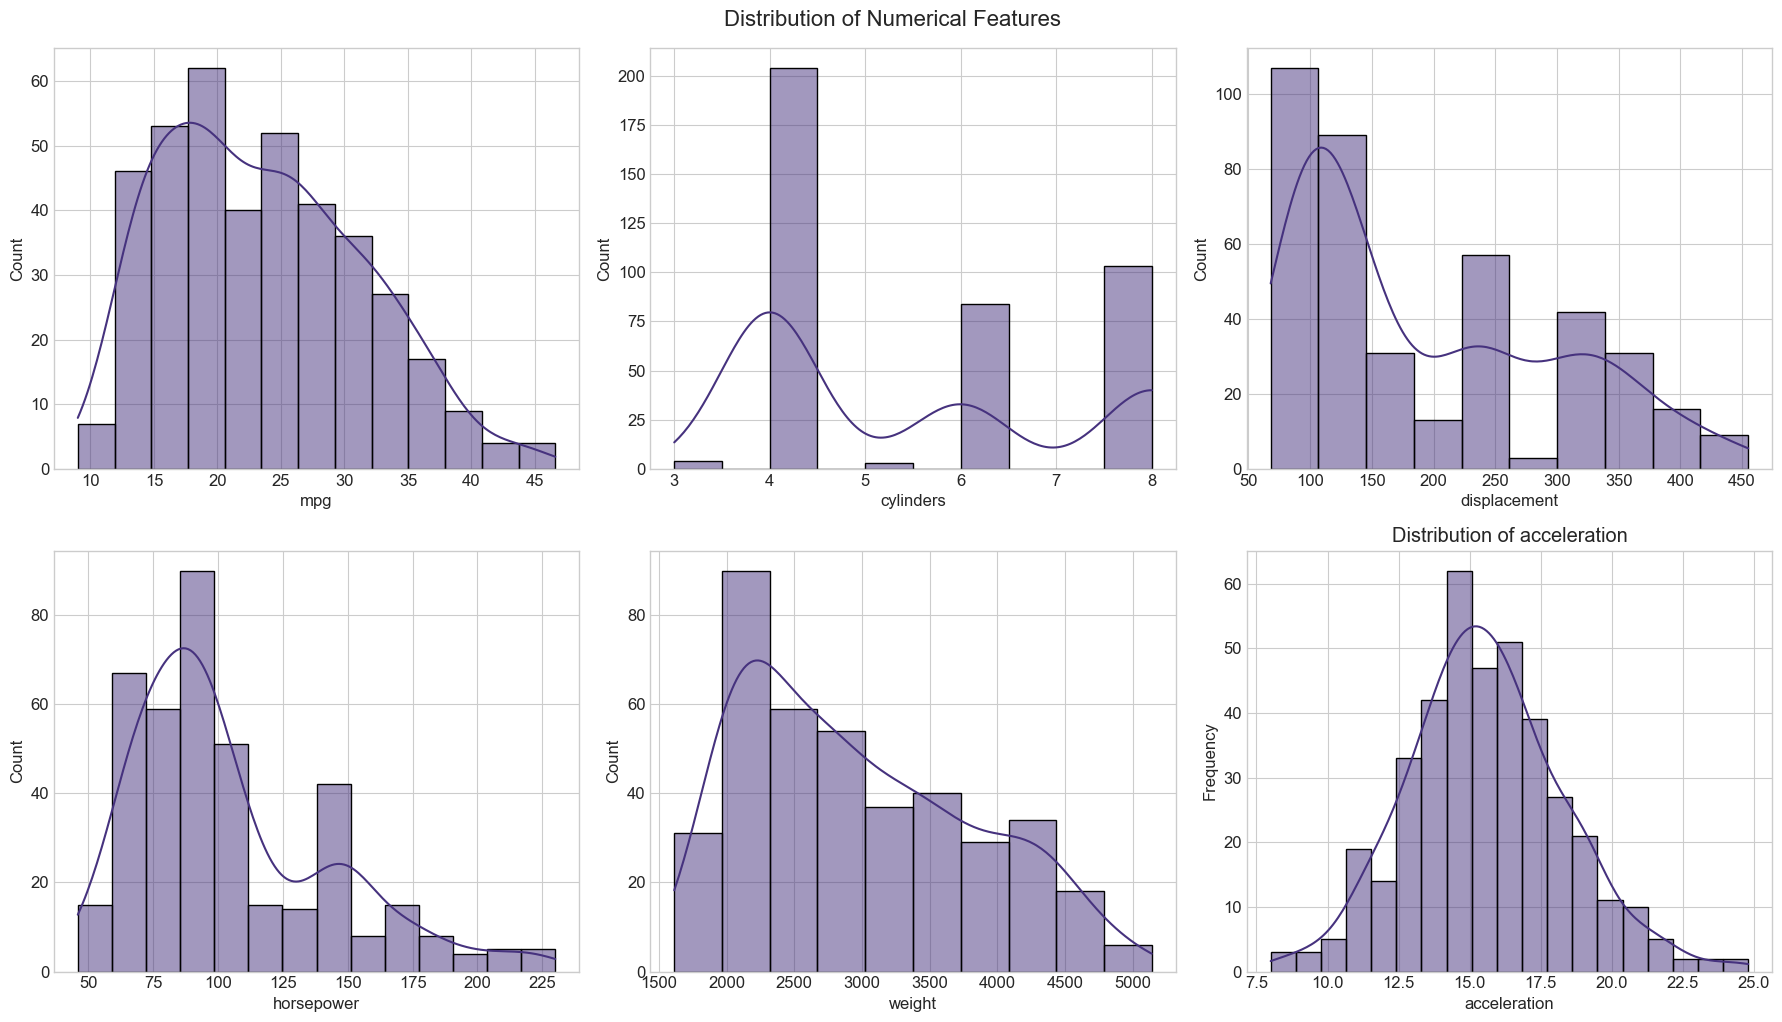

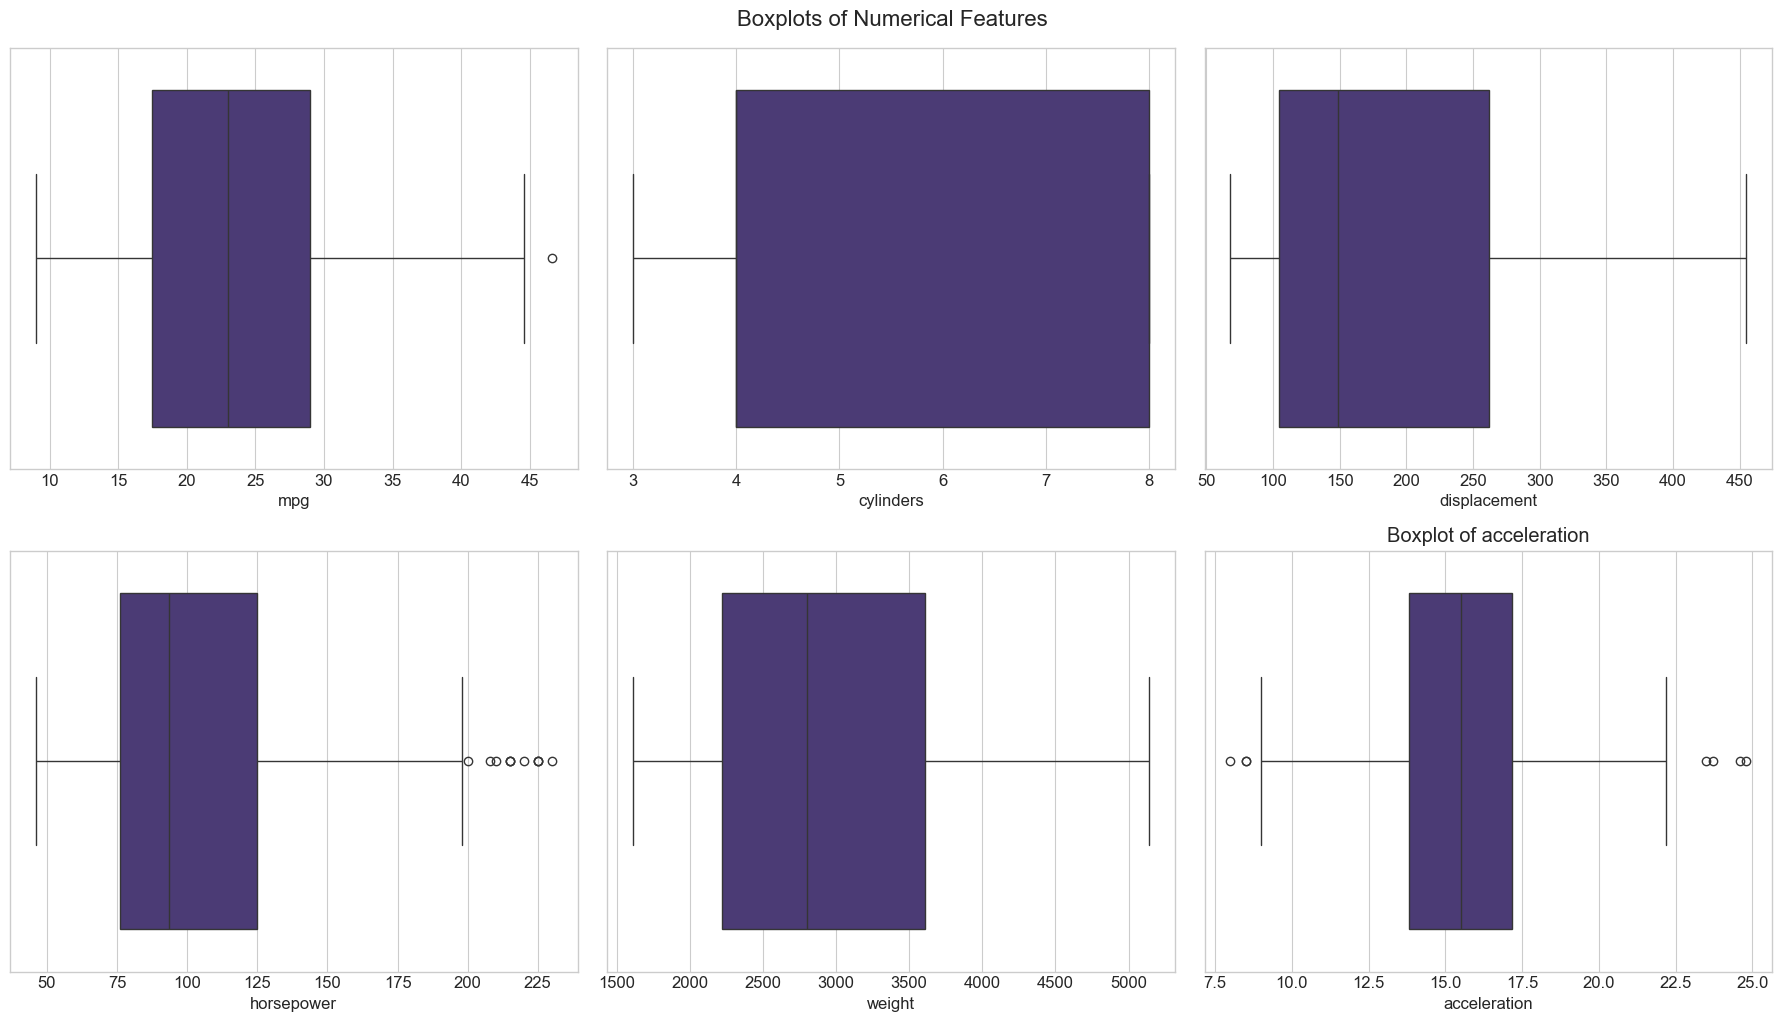

In [7]:
numerical_features = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
axes[i].set_title(f'Distribution of {feature}')
axes[i].set_xlabel(feature)
axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Distribution of Numerical Features', y=1.02, fontsize=16)
plt.show()

# Create boxplots to identify outliers
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df[feature], ax=axes[i])
axes[i].set_title(f'Boxplot of {feature}')
axes[i].set_xlabel(feature)

plt.tight_layout()
plt.suptitle('Boxplots of Numerical Features', y=1.02, fontsize=16)
plt.show()


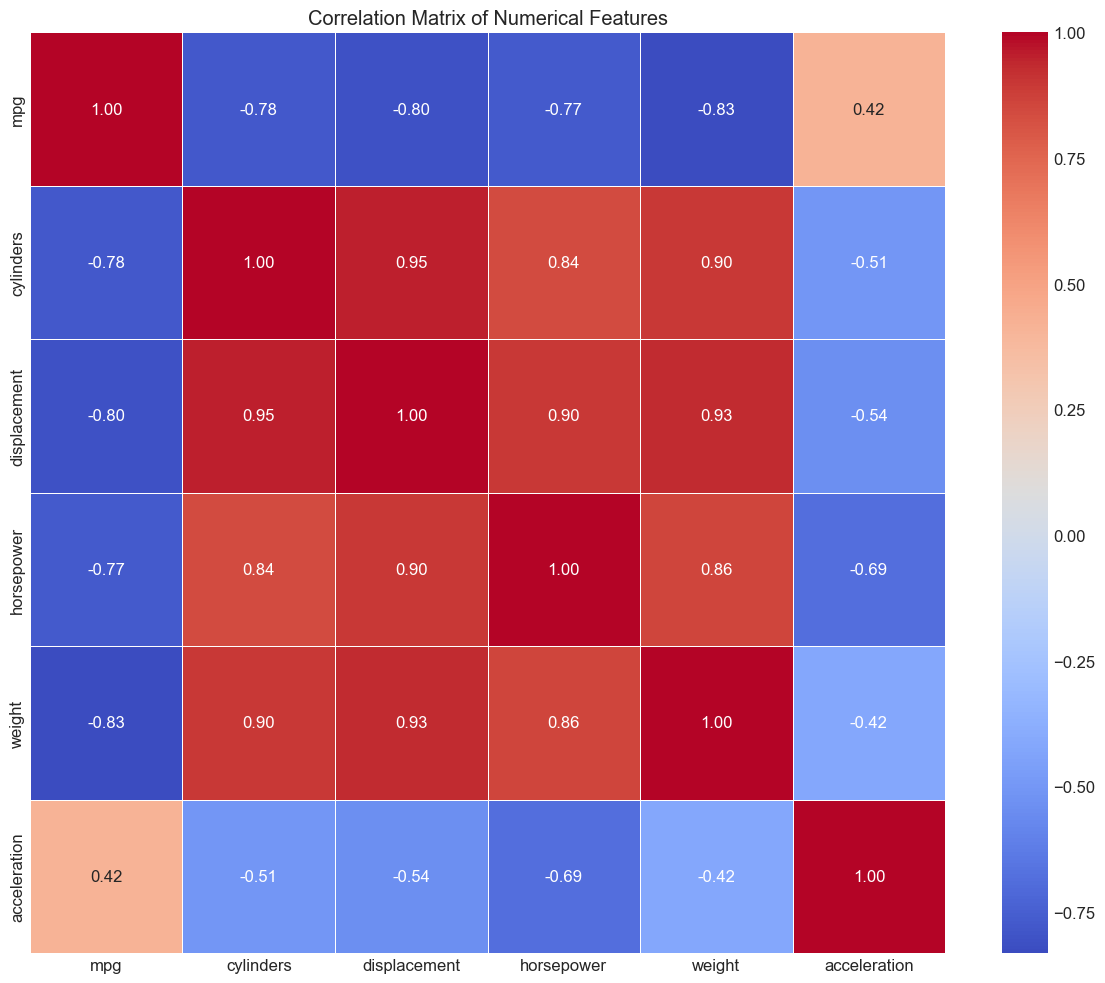

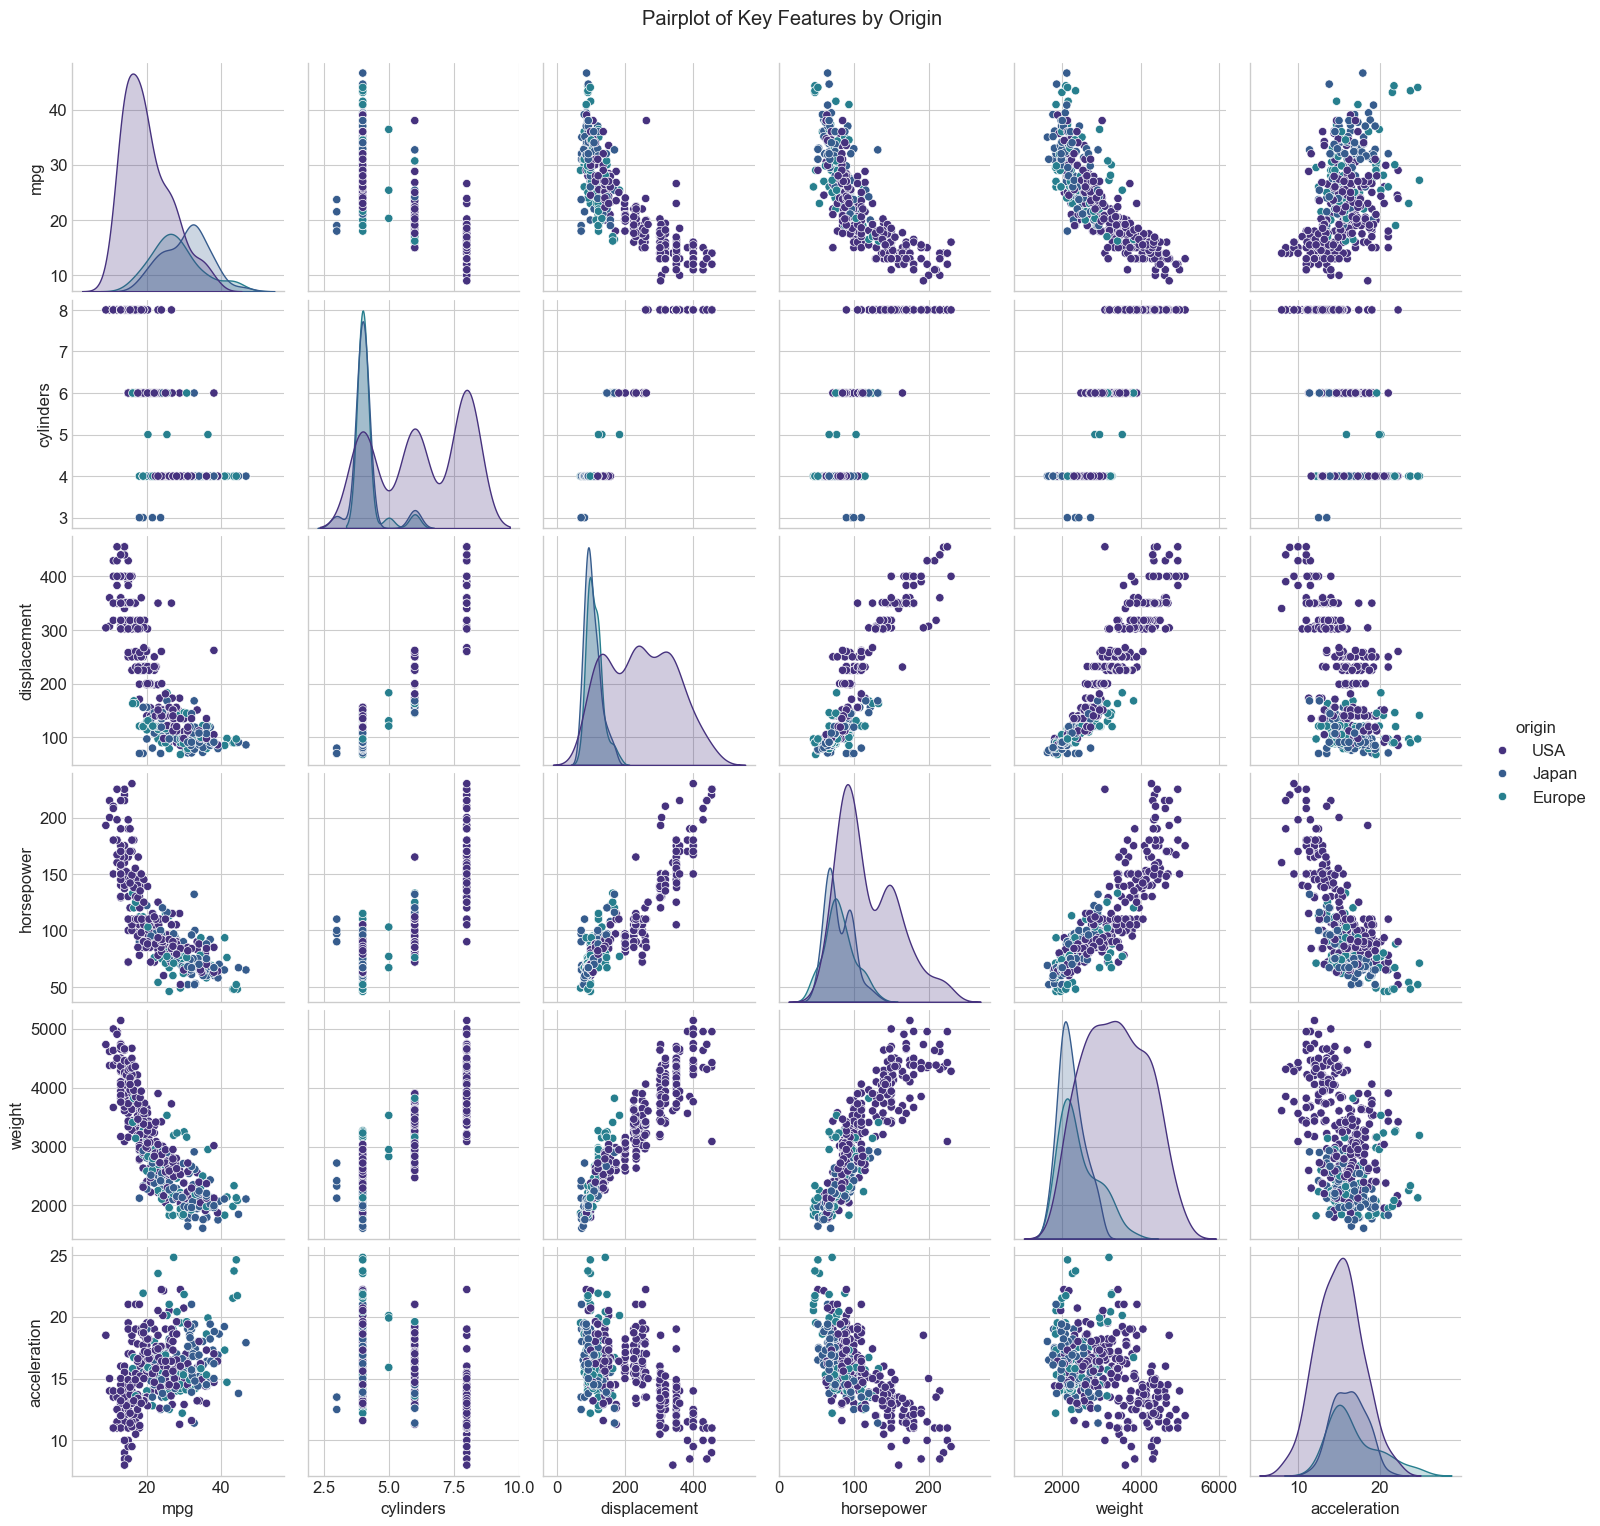

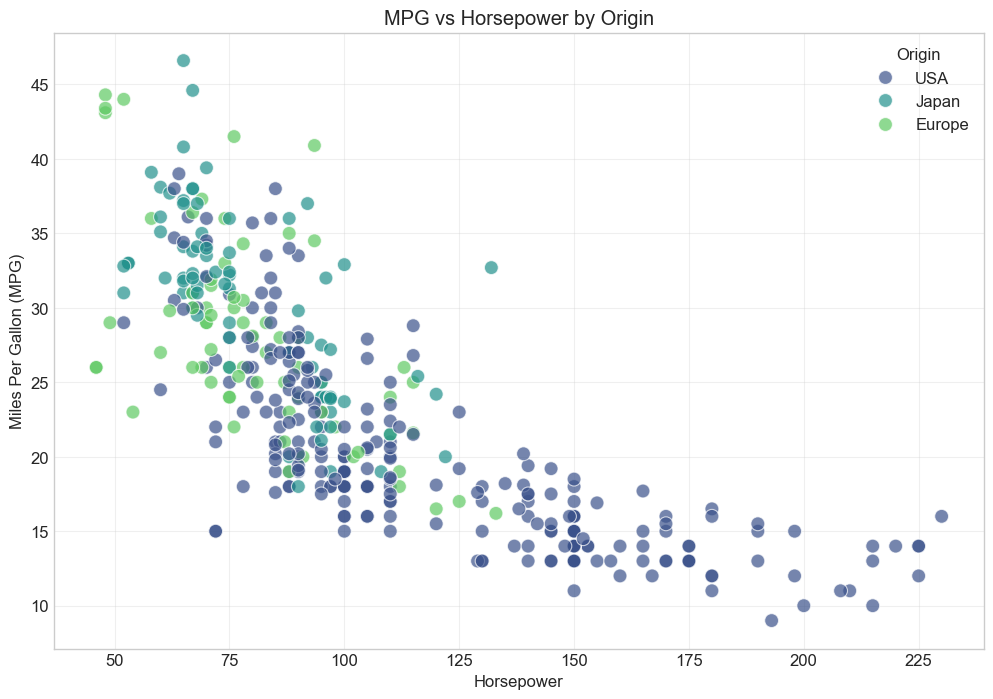

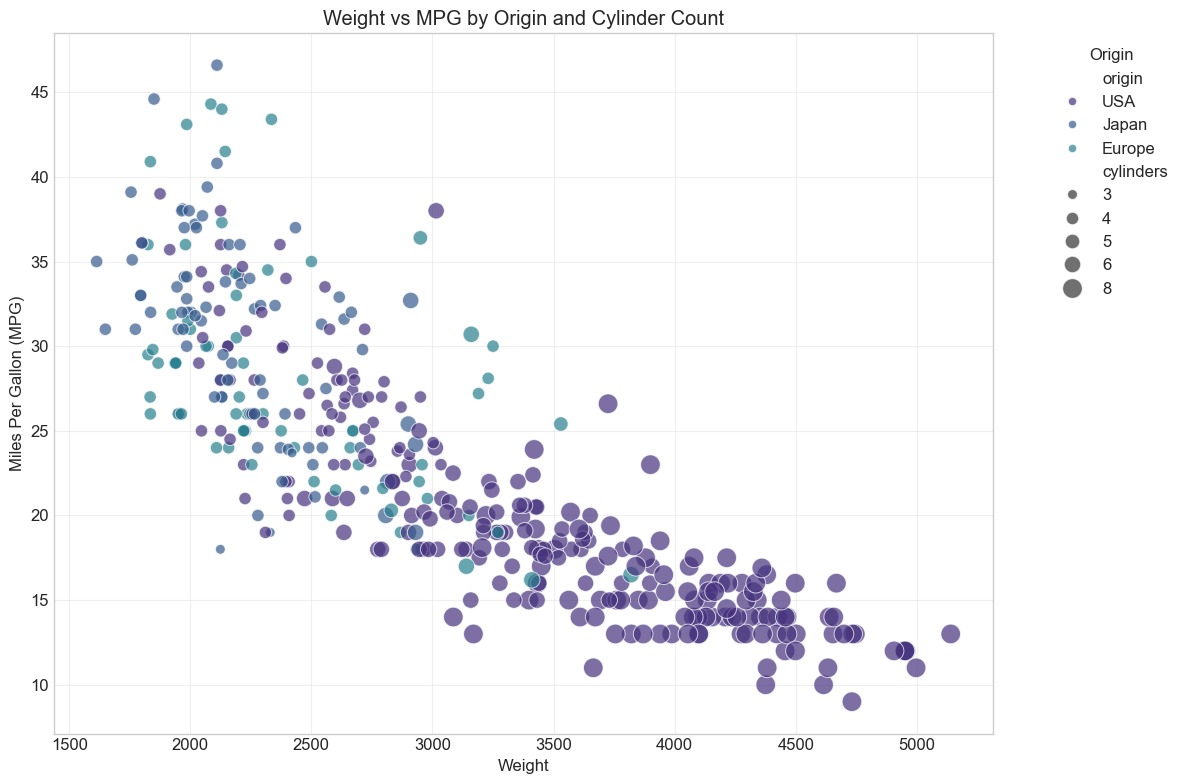

In [8]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Pairplot for key features
sns.pairplot(df[numerical_features + ['origin']], hue='origin', height=2.5)
plt.suptitle('Pairplot of Key Features by Origin', y=1.02)
plt.show()

# Scatter plot: MPG vs Horsepower with Origin color coding
plt.figure(figsize=(12, 8))
sns.scatterplot(x='horsepower', y='mpg', hue='origin', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('MPG vs Horsepower by Origin')
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon (MPG)')
plt.grid(True, alpha=0.3)
plt.legend(title='Origin')
plt.show()

# Scatter plot: Weight vs MPG with Cylinder count as size
plt.figure(figsize=(12, 8))
sns.scatterplot(x='weight', y='mpg', size='cylinders', hue='origin', data=df, sizes=(50, 200), alpha=0.7)
plt.title('Weight vs MPG by Origin and Cylinder Count')
plt.xlabel('Weight')
plt.ylabel('Miles Per Gallon (MPG)')
plt.grid(True, alpha=0.3)
plt.legend(title='Origin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


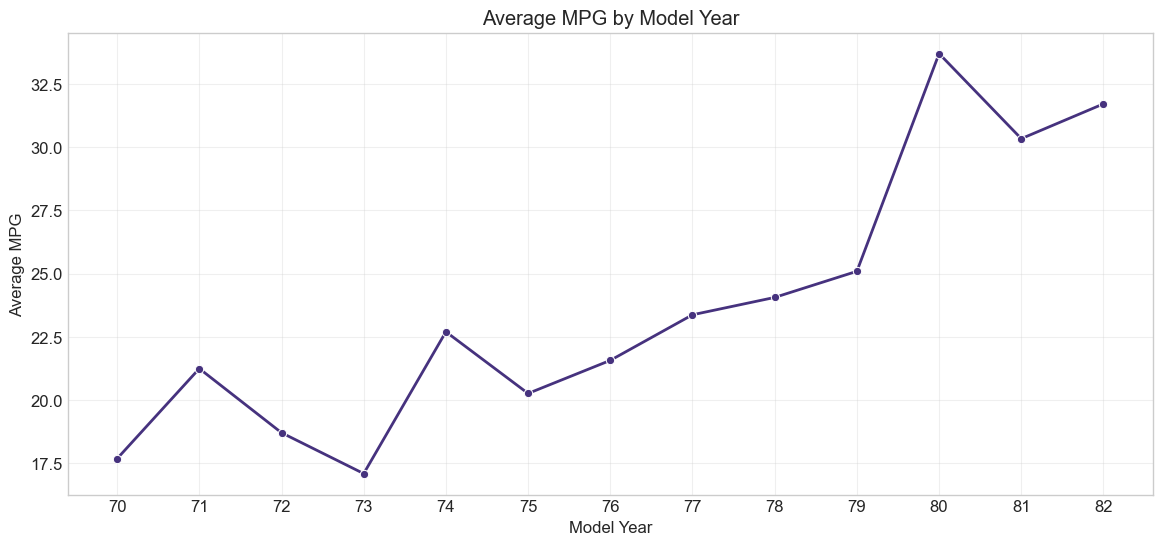

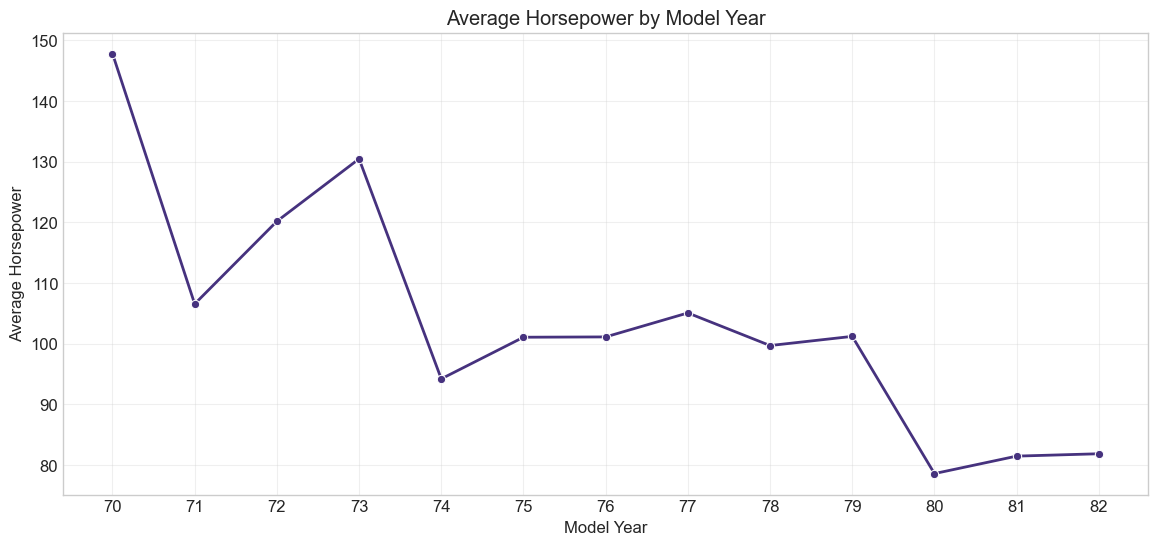

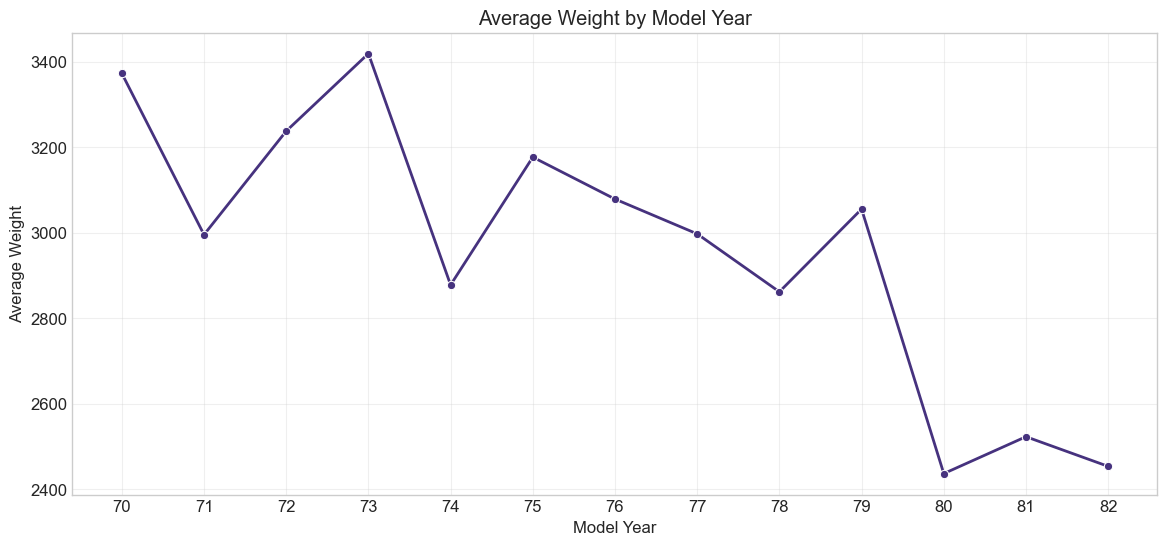

C:\Users\Ruchir\AppData\Local\Temp\ipykernel_30696\465481459.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='model_year', y='mpg', hue='origin', data=df, marker='o', ci=None)


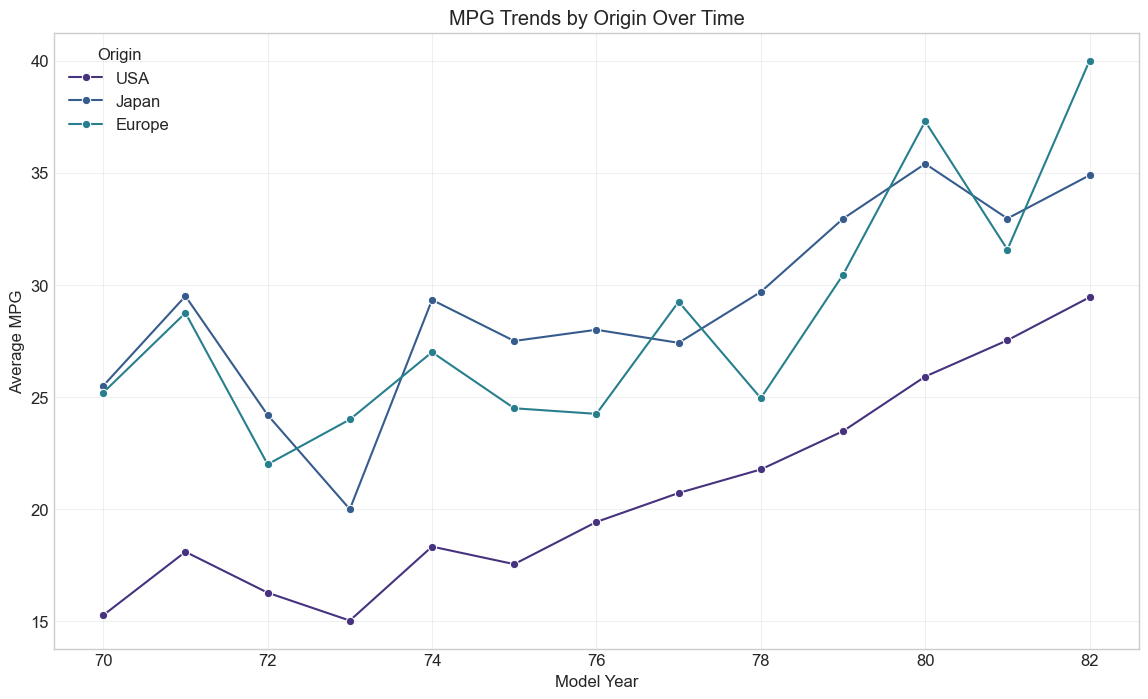

In [9]:
plt.figure(figsize=(14, 6))
yearly_mpg = df.groupby('model_year')['mpg'].mean().reset_index()
sns.lineplot(x='model_year', y='mpg', data=yearly_mpg, marker='o', linewidth=2)
plt.title('Average MPG by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_mpg['model_year'])
plt.show()

plt.figure(figsize=(14, 6))
yearly_hp = df.groupby('model_year')['horsepower'].mean().reset_index()
sns.lineplot(x='model_year', y='horsepower', data=yearly_hp, marker='o', linewidth=2)
plt.title('Average Horsepower by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Horsepower')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_hp['model_year'])
plt.show()

plt.figure(figsize=(14, 6))
yearly_weight = df.groupby('model_year')['weight'].mean().reset_index()
sns.lineplot(x='model_year', y='weight', data=yearly_weight, marker='o', linewidth=2)
plt.title('Average Weight by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Weight')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_weight['model_year'])
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(x='model_year', y='mpg', hue='origin', data=df, marker='o', ci=None)
plt.title('MPG Trends by Origin Over Time')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.grid(True, alpha=0.3)
plt.legend(title='Origin')
plt.show()


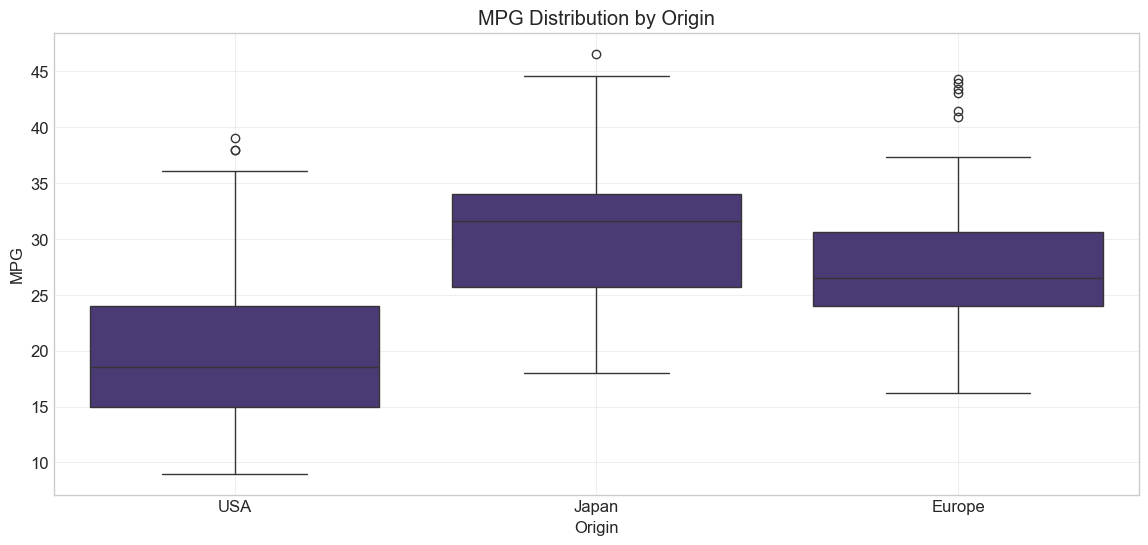

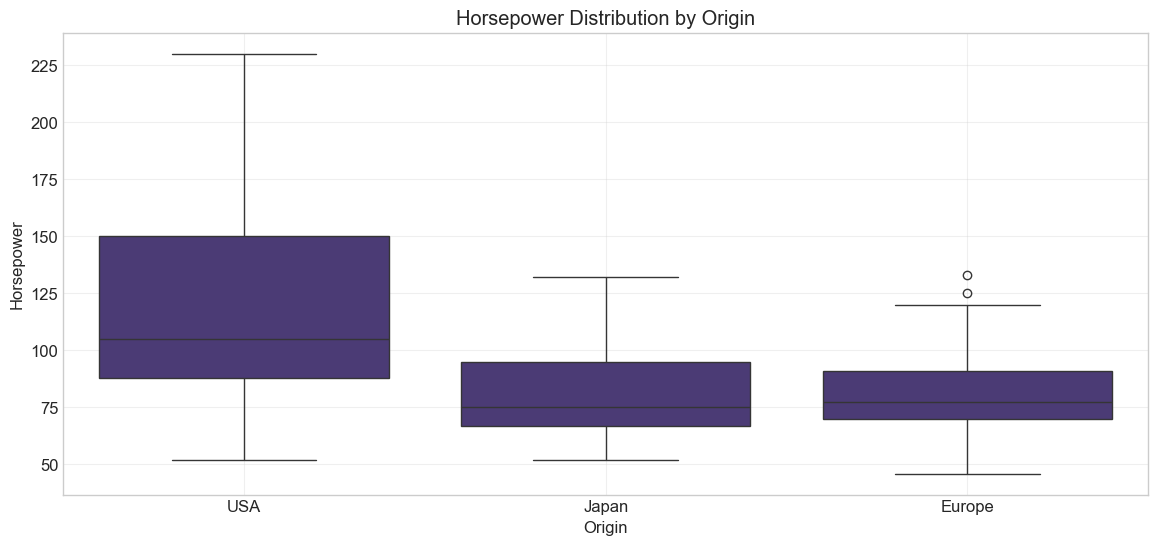

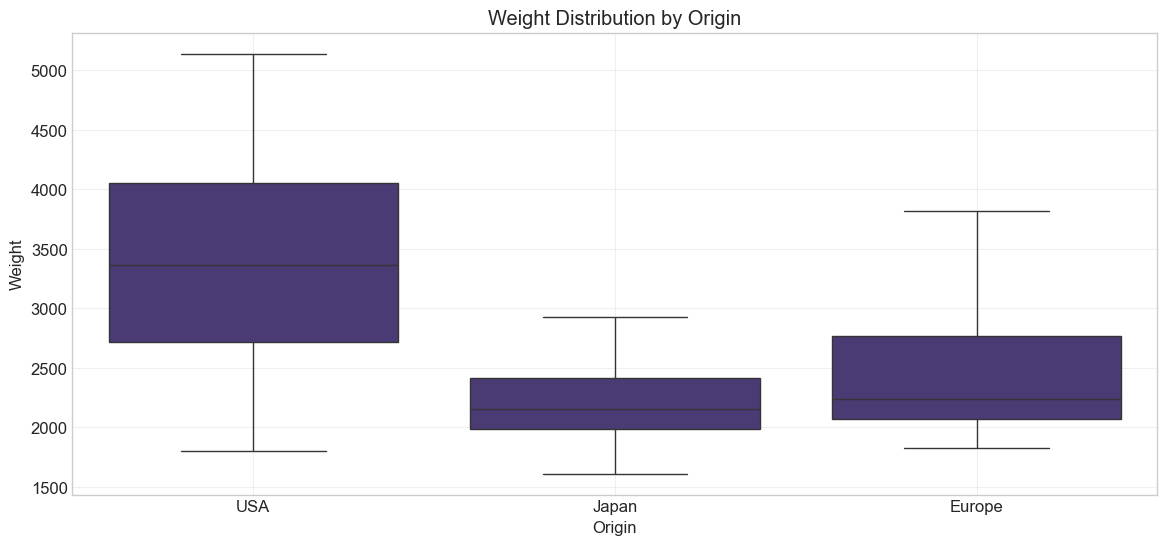

<Figure size 1200x600 with 0 Axes>

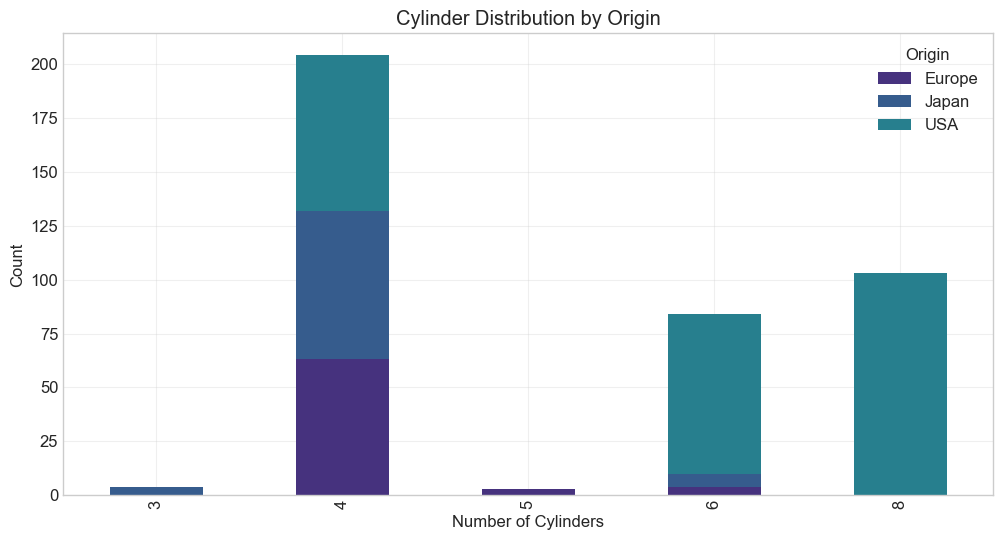

In [10]:
# MPG distribution by origin
plt.figure(figsize=(14, 6))
sns.boxplot(x='origin', y='mpg', data=df)
plt.title('MPG Distribution by Origin')
plt.xlabel('Origin')
plt.ylabel('MPG')
plt.grid(True, alpha=0.3)
plt.show()

# Horsepower distribution by origin
plt.figure(figsize=(14, 6))
sns.boxplot(x='origin', y='horsepower', data=df)
plt.title('Horsepower Distribution by Origin')
plt.xlabel('Origin')
plt.ylabel('Horsepower')
plt.grid(True, alpha=0.3)
plt.show()

# Weight distribution by origin
plt.figure(figsize=(14, 6))
sns.boxplot(x='origin', y='weight', data=df)
plt.title('Weight Distribution by Origin')
plt.xlabel('Origin')
plt.ylabel('Weight')
plt.grid(True, alpha=0.3)
plt.show()

# Cylinder distribution by origin
plt.figure(figsize=(12, 6))
cylinder_origin = pd.crosstab(df['cylinders'], df['origin'])
cylinder_origin.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Cylinder Distribution by Origin')
plt.xlabel('Number of Cylinders')
plt.ylabel('Count')
plt.legend(title='Origin')
plt.grid(True, alpha=0.3)
plt.show()


In [11]:
# Group statistics by origin
origin_stats = df.groupby('origin')[numerical_features].agg(['mean', 'median', 'std', 'min', 'max'])
print('Statistics by Origin:')
display(origin_stats)

# Group statistics by model year
year_stats = df.groupby('model_year')[numerical_features].agg(['mean', 'median', 'std', 'min', 'max'])
print('\nStatistics by Model Year:')
display(year_stats)

# Group statistics by cylinder count
cylinder_stats = df.groupby('cylinders')[numerical_features].agg(['mean', 'median', 'std', 'min', 'max'])
print('\nStatistics by Cylinder Count:')
display(cylinder_stats)

# ANOVA test to compare MPG across origins
from scipy import stats

usa_mpg = df[df['origin'] == 'USA']['mpg']
japan_mpg = df[df['origin'] == 'Japan']['mpg']
europe_mpg = df[df['origin'] == 'Europe']['mpg']

f_stat, p_value = stats.f_oneway(usa_mpg, japan_mpg, europe_mpg)
print('\nANOVA Test for MPG across Origins:')
print(f'F-statistic: {f_stat:.4f}')
print(f'p-value: {p_value:.4f}')
print(f'Significant difference: {"Yes" if p_value < 0.05 else "No"}')


Statistics by Origin:


mpg                              cylinders                       \
             mean median       std   min   max      mean median       std min   
origin                                                                          
Europe  27.891429   26.5  6.723930  16.2  44.3  4.157143    4.0  0.500310   4   
Japan   30.450633   31.6  6.090048  18.0  46.6  4.101266    4.0  0.590414   3   
USA     20.083534   18.5  6.402892   9.0  39.0  6.248996    6.0  1.661425   4   

            ...       weight                                 acceleration  \
       max  ...         mean  median         std   min   max         mean   
origin      ...                                                             
Europe   6  ...  2423.300000  2240.0  490.043191  1825  3820    16.787143   
Japan    6  ...  2221.227848  2155.0  320.497248  1613  2930    16.172152   
USA      8  ...  3361.931727  3365.0  794.792506  1800  5140    15.033735   

                                     
       median       std   min   max  
origin                               
Europe   15.7  3.045687  12.2  24.8  
Japan    16.4  1.954937  11.4  21.0  
USA      15.0  2.751112   8.0  22.2  

[3 rows x 30 columns]


Statistics by Model Year:


mpg                              cylinders                   \
                 mean median       std   min   max      mean median       std   
model_year                                                                      
70          17.689655  16.00  5.339231   9.0  27.0  6.758621    8.0  1.724926   
71          21.250000  19.00  6.591942  12.0  35.0  5.571429    6.0  1.665079   
72          18.714286  18.50  5.435529  11.0  28.0  5.821429    4.0  2.073708   
73          17.100000  16.00  4.700245  11.0  29.0  6.375000    7.0  1.807215   
74          22.703704  24.00  6.420010  13.0  32.0  5.259259    4.0  1.583390   
75          20.266667  19.50  4.940566  13.0  33.0  5.600000    6.0  1.522249   
76          21.573529  21.00  5.889297  13.0  33.0  5.647059    6.0  1.667558   
77          23.375000  21.75  6.675862  15.0  36.0  5.464286    4.0  1.815206   
78          24.061111  20.70  6.898044  16.2  43.1  5.361111    5.5  1.495761   
79          25.093103  23.90  6.794217  15.5  37.3  5.827586    6.0  1.774199   
80          33.696552  32.70  7.037983  19.1  46.6  4.137931    4.0  0.580895   
81          30.334483  31.60  5.591465  17.6  39.1  4.620690    4.0  1.082781   
82          31.709677  32.00  5.392548  22.0  44.0  4.193548    4.0  0.601074   

                    ...       weight                                   \
           min max  ...         mean  median          std   min   max   
model_year          ...                                                 
70           4   8  ...  3372.793103  3449.0   852.868663  1835  4732   
71           4   8  ...  2995.428571  2798.0  1061.830859  1613  5140   
72           3   8  ...  3237.714286  2956.0   974.520960  2100  4633   
73           3   8  ...  3419.025000  3338.5   974.809133  1867  4997   
74           4   8  ...  2877.925926  2489.0   949.308571  1649  4699   
75           4   8  ...  3176.800000  3098.5   765.179781  1795  4668   
76           4   8  ...  3078.735294  3171.5   821.371481  1795  4380   
77           3   8  ...  2997.357143  2747.5   912.825902  1825  4335   
78           4   8  ...  2861.805556  2910.0   626.023907  1800  4080   
79           4   8  ...  3055.344828  3190.0   747.881497  1915  4360   
80           3   6  ...  2436.655172  2335.0   432.235491  1835  3381   
81           4   8  ...  2522.931034  2385.0   533.600501  1755  3725   
82           4   6  ...  2453.548387  2525.0   354.276713  1965  3035   

           acceleration                               
                   mean median       std   min   max  
model_year                                            
70            12.948276  12.50  3.330982   8.0  20.5  
71            15.142857  14.50  2.666171  11.5  20.5  
72            15.125000  14.50  2.850032  11.0  23.5  
73            14.312500  14.00  2.754222   9.5  21.0  
74            16.203704  16.00  1.688532  13.5  21.0  
75            16.050000  16.00  2.471737  11.5  21.0  
76            15.941176  15.50  2.801419  12.0  22.2  
77            15.435714  15.65  2.273391  11.1  19.0  
78            15.805556  15.75  2.129915  11.2  21.5  
79            15.813793  15.00  2.952931  11.3  24.8  
80            16.934483  16.50  2.826694  11.4  23.7  
81            16.306897  16.20  2.192509  12.6  20.7  
82            16.638710  16.40  2.484844  11.6  24.6  

[13 rows x 30 columns]


Statistics by Cylinder Count:


mpg                              cylinders                  \
                mean median       std   min   max      mean median  std min   
cylinders                                                                     
3          20.550000  20.25  2.564501  18.0  23.7       3.0    3.0  0.0   3   
4          29.286765  28.25  5.710156  18.0  46.6       4.0    4.0  0.0   4   
5          27.366667  25.40  8.228204  20.3  36.4       5.0    5.0  0.0   5   
6          19.985714  19.00  3.807322  15.0  38.0       6.0    6.0  0.0   6   
8          14.963107  14.00  2.836284   9.0  26.6       8.0    8.0  0.0   8   

               ...       weight                                 acceleration  \
          max  ...         mean  median         std   min   max         mean   
cylinders      ...                                                             
3           3  ...  2398.500000  2375.0  247.566153  2124  2720    13.250000   
4           4  ...  2308.127451  2232.0  347.093936  1613  3270    16.601471   
5           5  ...  3103.333333  2950.0  374.343870  2830  3530    18.633333   
6           6  ...  3198.226190  3201.5  332.297419  2472  3907    16.263095   
8           8  ...  4114.718447  4140.0  448.833159  3086  5140    12.955340   

                                        
          median       std   min   max  
cylinders                               
3           13.5  0.500000  12.5  13.5  
4           16.2  2.382210  11.6  24.8  
5           19.9  2.369247  15.9  20.1  
6           16.1  2.021140  11.3  21.0  
8           13.0  2.224759   8.0  22.2  

[5 rows x 30 columns]


ANOVA Test for MPG across Origins:
F-statistic: 98.5418
p-value: 0.0000
Significant difference: Yes


Model Performance:
Mean Squared Error: 14.7143
Root Mean Squared Error: 3.8359
R² Score: 0.7263

Feature Coefficients:


,Feature,Coefficient
3,weight,-0.005162
1,displacement,-0.006015
2,horsepower,-0.044519
4,acceleration,-0.050098
0,cylinders,-0.193516


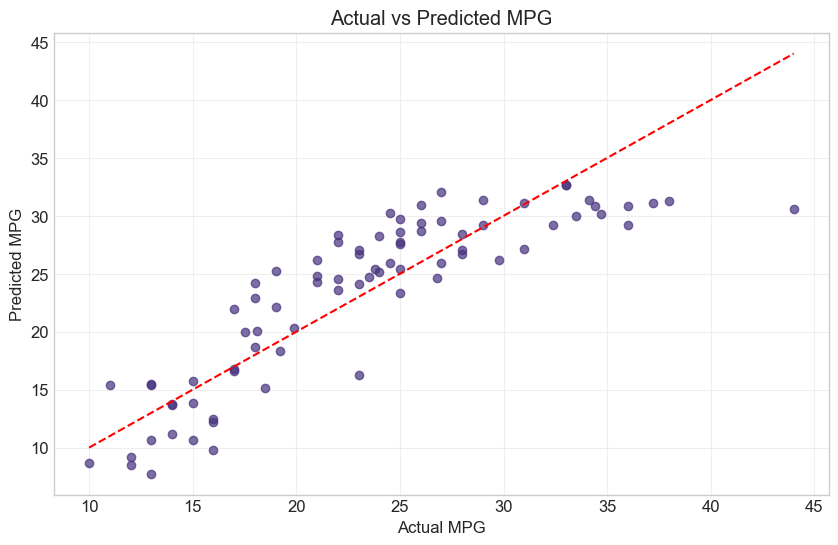

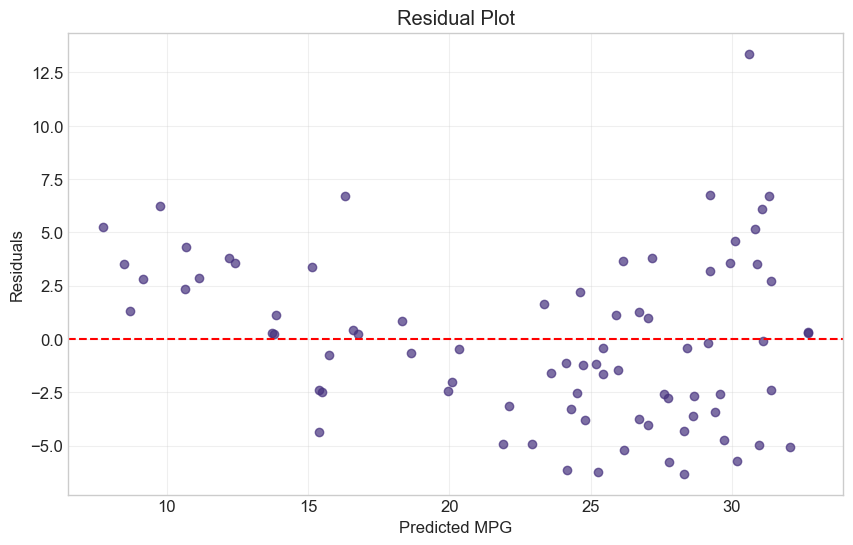

In [12]:
# Prepare data for modeling
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = df['mpg']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Model Performance:')
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

# Display feature importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print('\nFeature Coefficients:')
display(coefficients.sort_values(by='Coefficient', ascending=False))

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.grid(True, alpha=0.3)
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted MPG')
plt.ylabel('Residuals')
plt.grid(True, alpha=0.3)
plt.show()


Advanced Model Performance:
Mean Squared Error: 13.8679
Root Mean Squared Error: 3.7240
R² Score: 0.7421


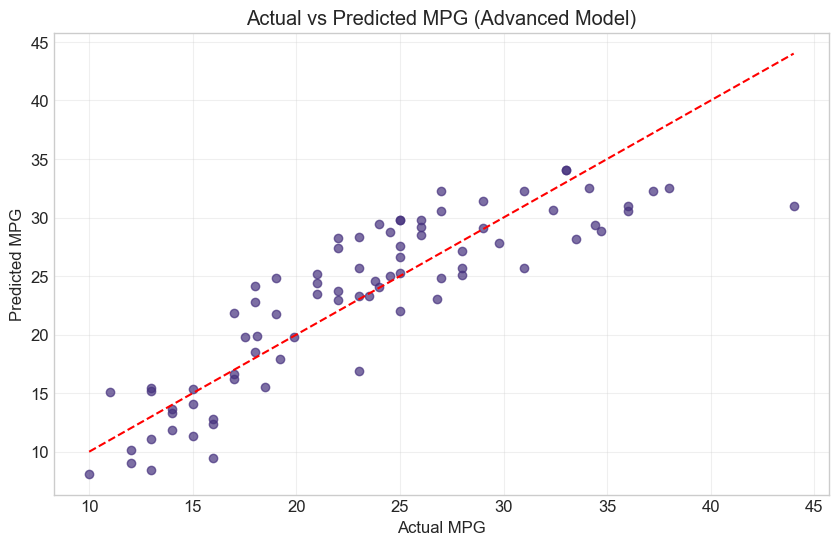

In [13]:
# Prepare data with origin as a categorical feature
X_with_origin = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'origin']]

# Define preprocessing for numerical and categorical features
numerical_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
categorical_features = ['origin']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_with_origin, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Advanced Model Performance:')
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted MPG (Advanced Model)')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.grid(True, alpha=0.3)
plt.show()


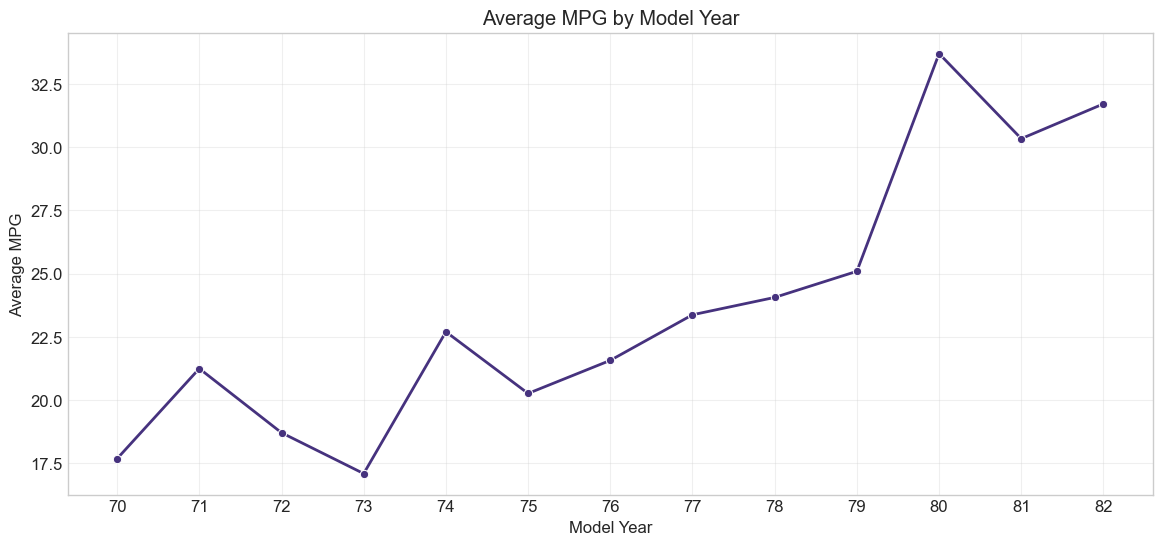

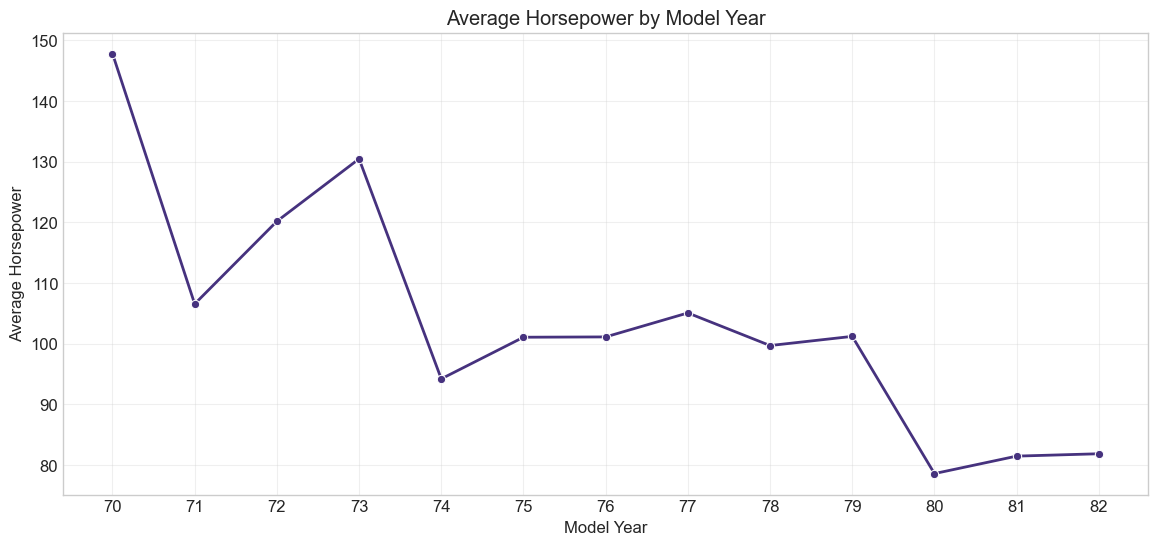

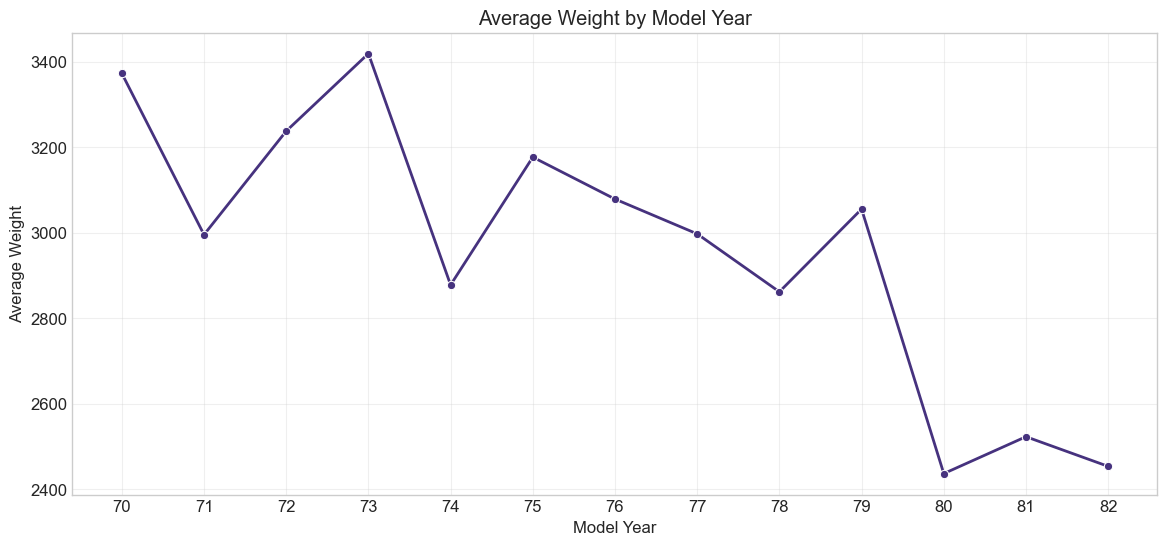

C:\Users\Ruchir\AppData\Local\Temp\ipykernel_30696\465481459.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='model_year', y='mpg', hue='origin', data=df, marker='o', ci=None)


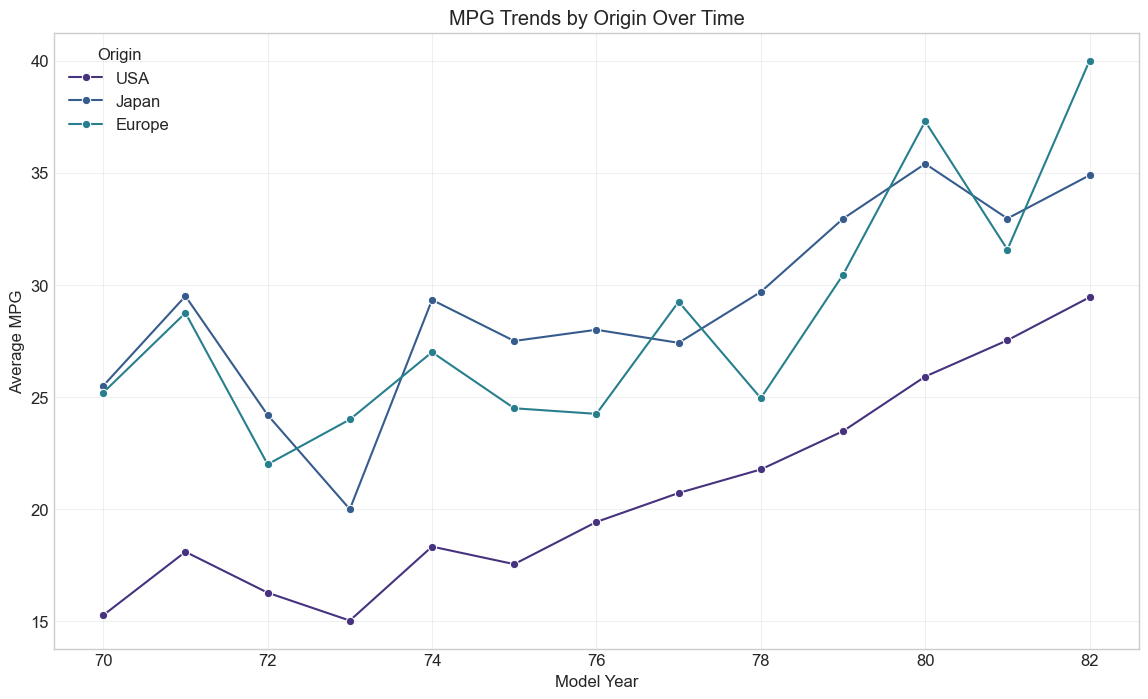

In [ ]:
plt.figure(figsize=(14, 6))
yearly_mpg = df.groupby('model_year')['mpg'].mean().reset_index()
sns.lineplot(x='model_year', y='mpg', data=yearly_mpg, marker='o', linewidth=2)
plt.title('Average MPG by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_mpg['model_year'])
plt.show()

plt.figure(figsize=(14, 6))
yearly_hp = df.groupby('model_year')['horsepower'].mean().reset_index()
sns.lineplot(x='model_year', y='horsepower', data=yearly_hp, marker='o', linewidth=2)
plt.title('Average Horsepower by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Horsepower')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_hp['model_year'])
plt.show()

plt.figure(figsize=(14, 6))
yearly_weight = df.groupby('model_year')['weight'].mean().reset_index()
sns.lineplot(x='model_year', y='weight', data=yearly_weight, marker='o', linewidth=2)
plt.title('Average Weight by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Weight')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_weight['model_year'])
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(x='model_year', y='mpg', hue='origin', data=df, marker='o', ci=None)
plt.title('MPG Trends by Origin Over Time')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.grid(True, alpha=0.3)
plt.legend(title='Origin')
plt.show()


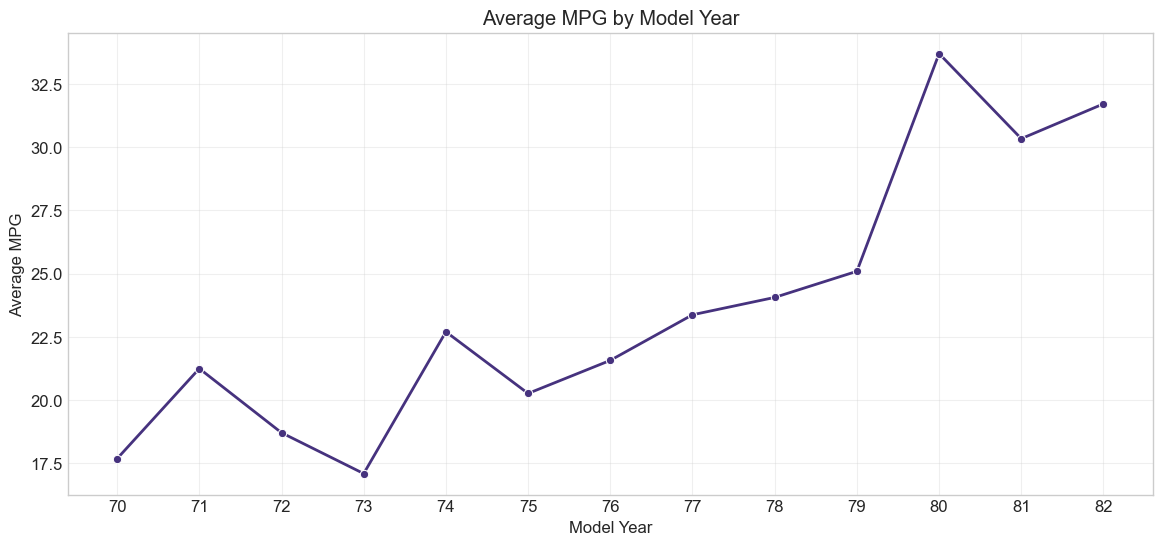

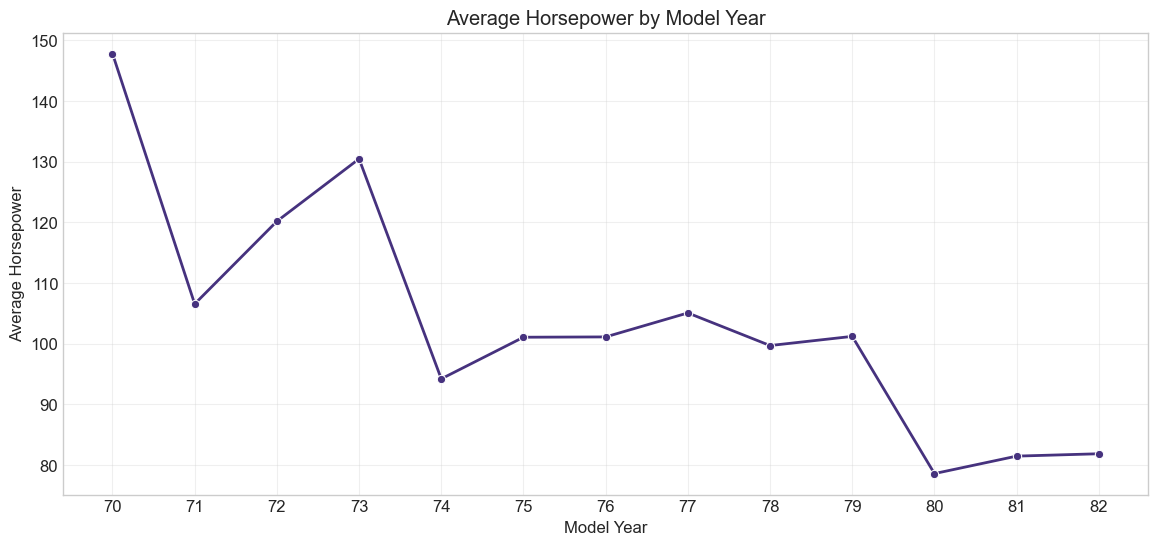

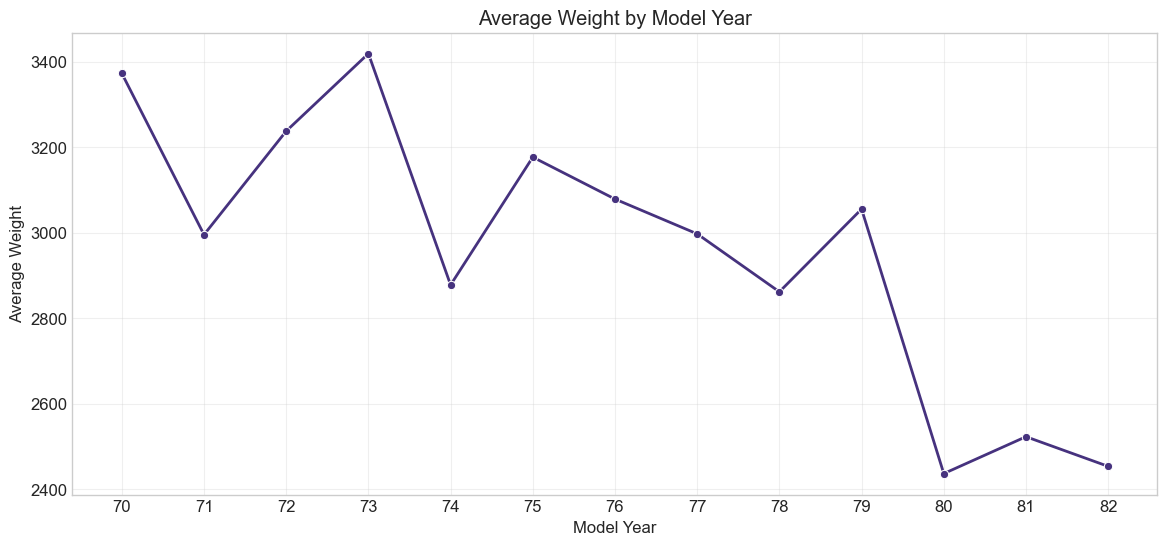

C:\Users\Ruchir\AppData\Local\Temp\ipykernel_30696\465481459.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='model_year', y='mpg', hue='origin', data=df, marker='o', ci=None)


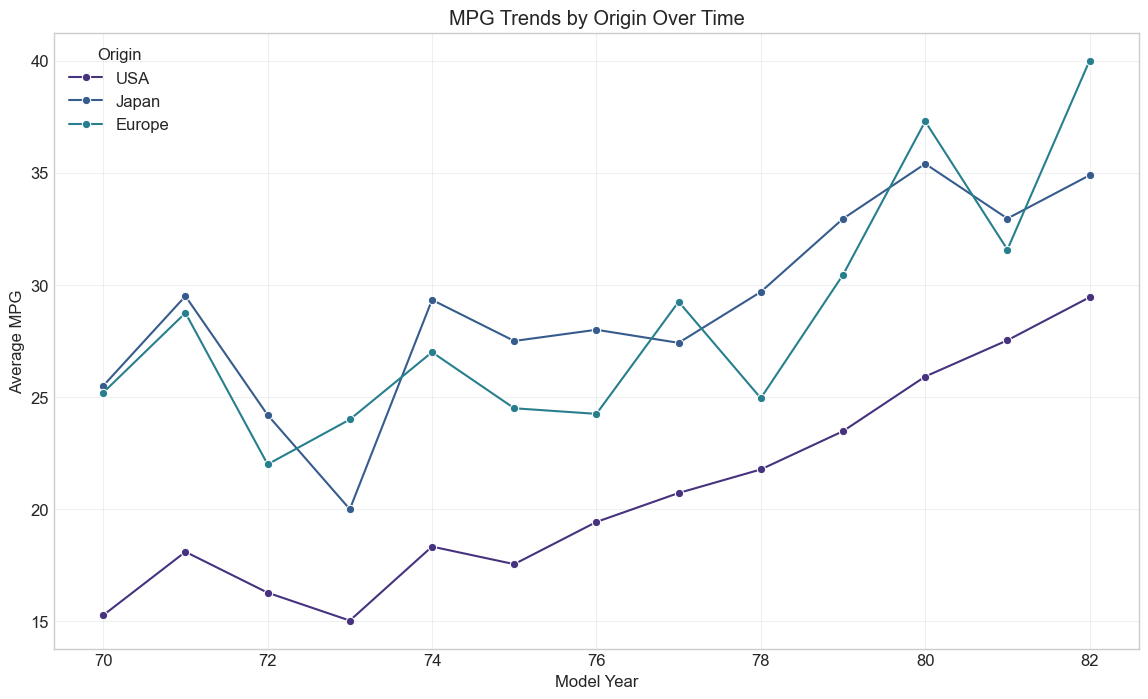

In [ ]:
plt.figure(figsize=(14, 6))
yearly_mpg = df.groupby('model_year')['mpg'].mean().reset_index()
sns.lineplot(x='model_year', y='mpg', data=yearly_mpg, marker='o', linewidth=2)
plt.title('Average MPG by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_mpg['model_year'])
plt.show()

plt.figure(figsize=(14, 6))
yearly_hp = df.groupby('model_year')['horsepower'].mean().reset_index()
sns.lineplot(x='model_year', y='horsepower', data=yearly_hp, marker='o', linewidth=2)
plt.title('Average Horsepower by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Horsepower')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_hp['model_year'])
plt.show()

plt.figure(figsize=(14, 6))
yearly_weight = df.groupby('model_year')['weight'].mean().reset_index()
sns.lineplot(x='model_year', y='weight', data=yearly_weight, marker='o', linewidth=2)
plt.title('Average Weight by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Weight')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_weight['model_year'])
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(x='model_year', y='mpg', hue='origin', data=df, marker='o', ci=None)
plt.title('MPG Trends by Origin Over Time')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.grid(True, alpha=0.3)
plt.legend(title='Origin')
plt.show()


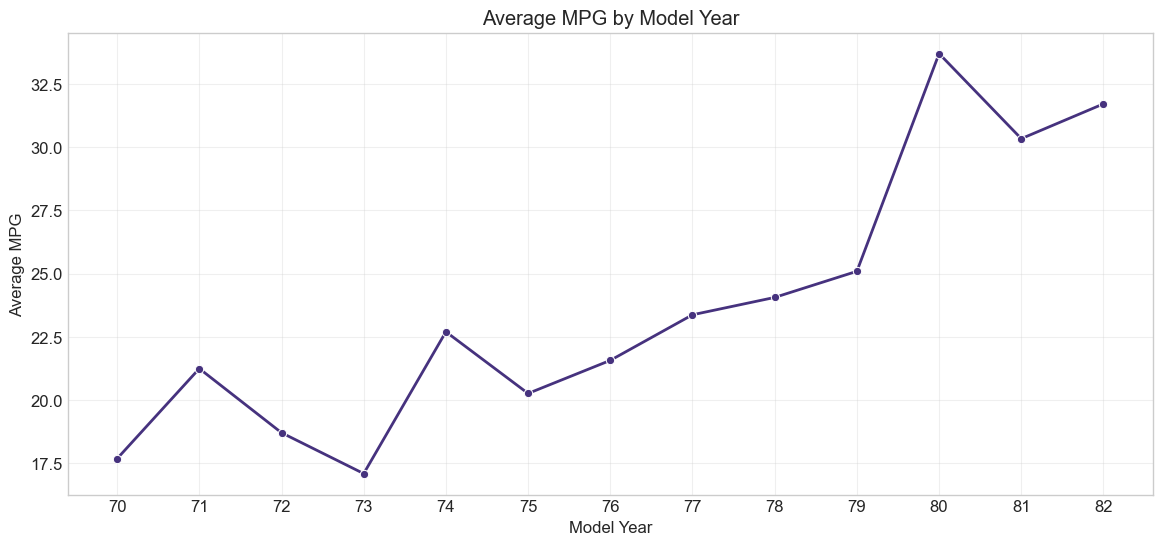

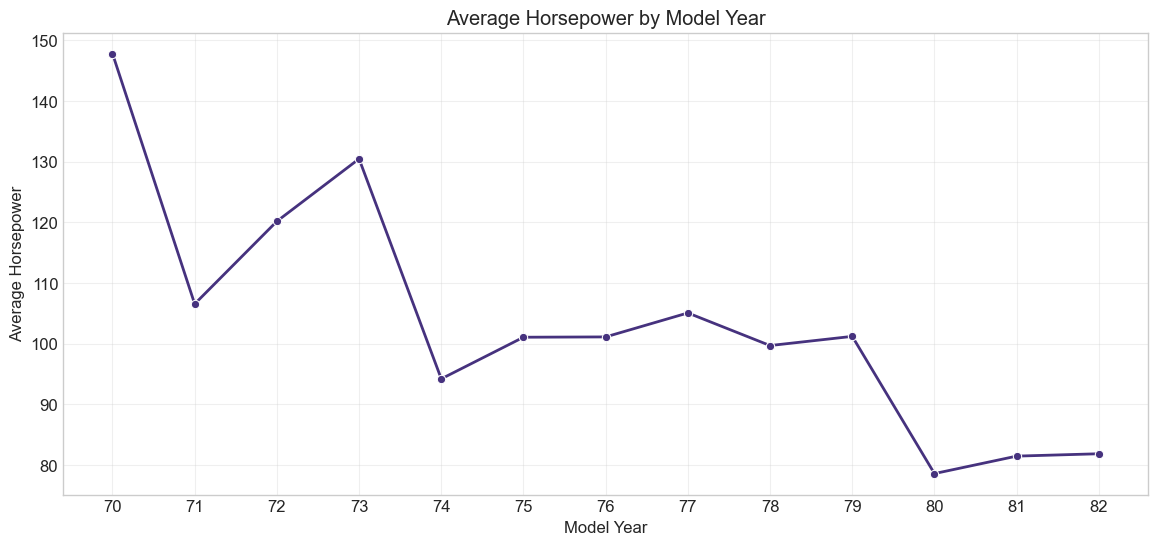

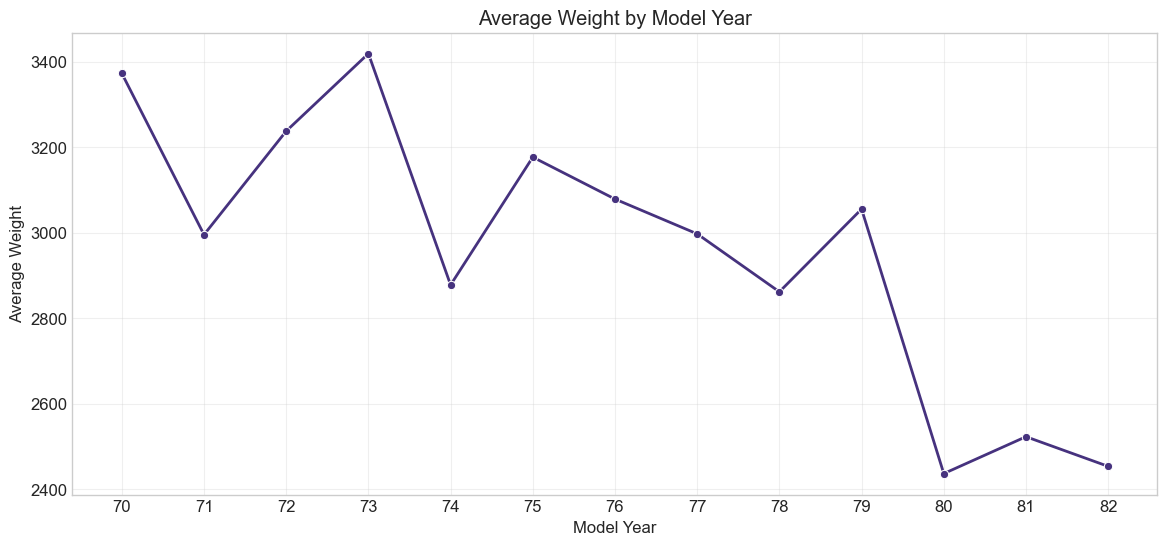

C:\Users\Ruchir\AppData\Local\Temp\ipykernel_30696\465481459.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='model_year', y='mpg', hue='origin', data=df, marker='o', ci=None)


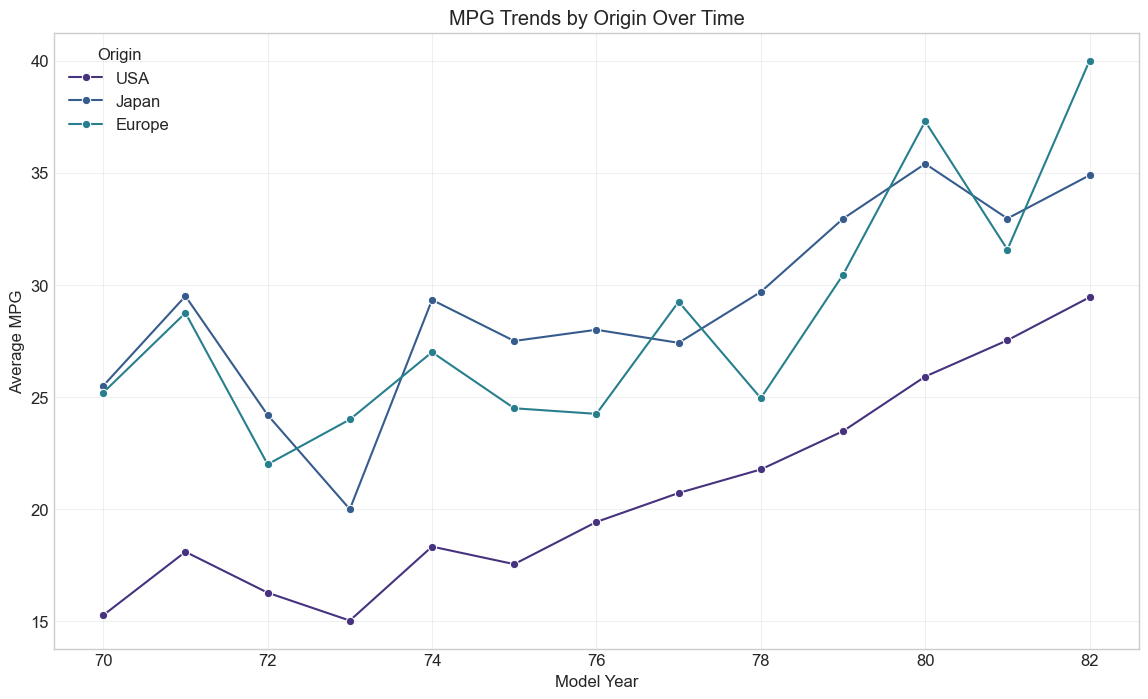

In [ ]:
plt.figure(figsize=(14, 6))
yearly_mpg = df.groupby('model_year')['mpg'].mean().reset_index()
sns.lineplot(x='model_year', y='mpg', data=yearly_mpg, marker='o', linewidth=2)
plt.title('Average MPG by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_mpg['model_year'])
plt.show()

plt.figure(figsize=(14, 6))
yearly_hp = df.groupby('model_year')['horsepower'].mean().reset_index()
sns.lineplot(x='model_year', y='horsepower', data=yearly_hp, marker='o', linewidth=2)
plt.title('Average Horsepower by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Horsepower')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_hp['model_year'])
plt.show()

plt.figure(figsize=(14, 6))
yearly_weight = df.groupby('model_year')['weight'].mean().reset_index()
sns.lineplot(x='model_year', y='weight', data=yearly_weight, marker='o', linewidth=2)
plt.title('Average Weight by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Weight')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_weight['model_year'])
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(x='model_year', y='mpg', hue='origin', data=df, marker='o', ci=None)
plt.title('MPG Trends by Origin Over Time')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.grid(True, alpha=0.3)
plt.legend(title='Origin')
plt.show()


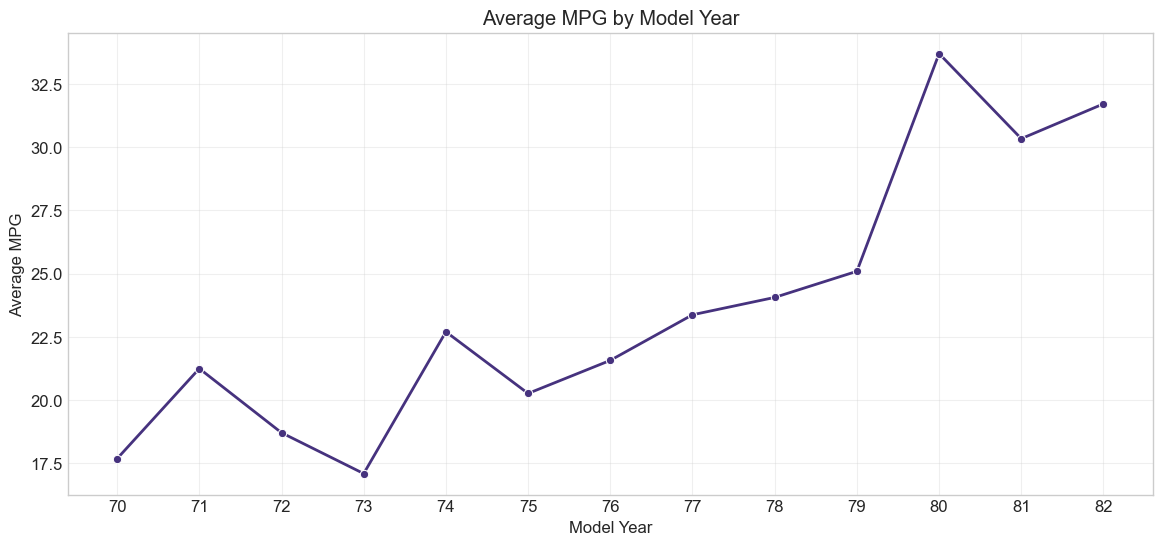

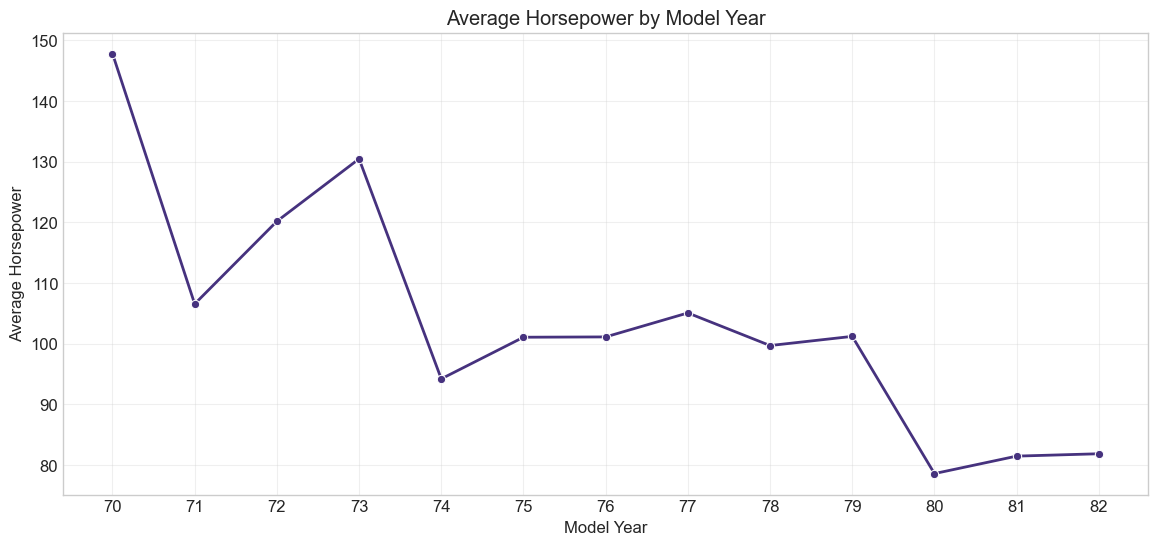

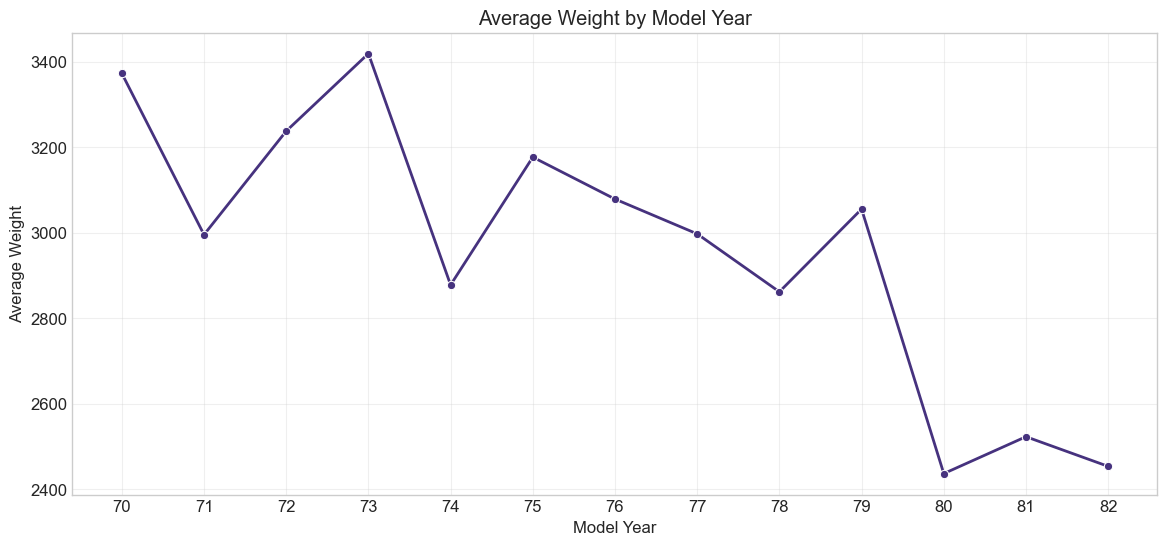

C:\Users\Ruchir\AppData\Local\Temp\ipykernel_30696\465481459.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='model_year', y='mpg', hue='origin', data=df, marker='o', ci=None)


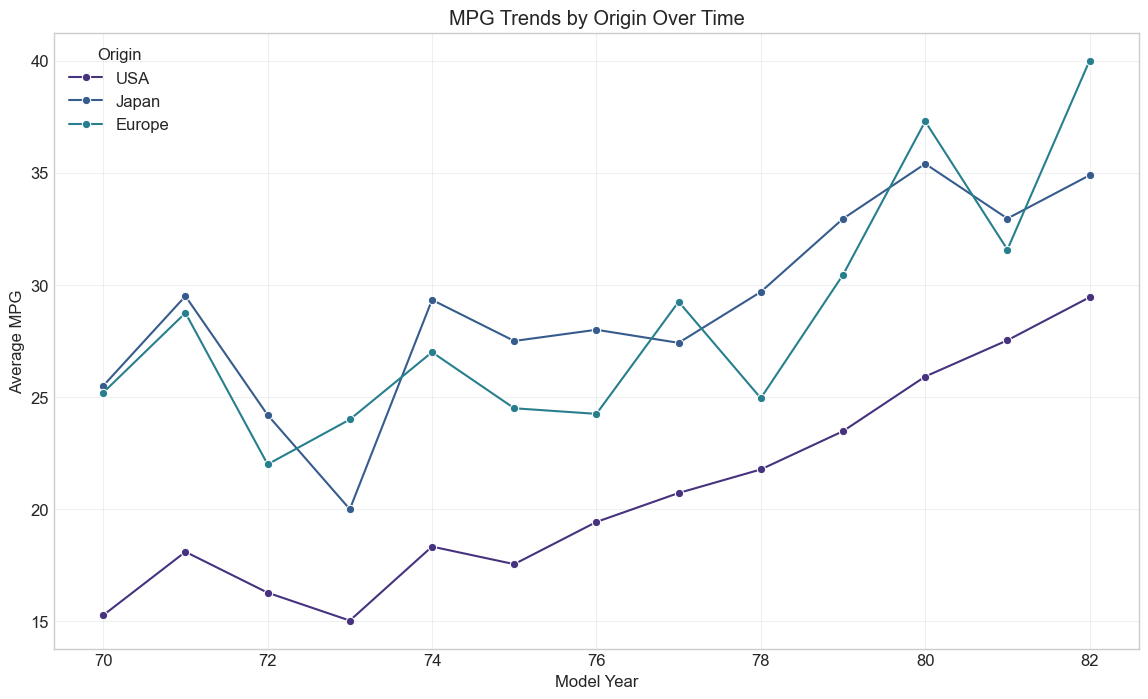

In [ ]:
plt.figure(figsize=(14, 6))
yearly_mpg = df.groupby('model_year')['mpg'].mean().reset_index()
sns.lineplot(x='model_year', y='mpg', data=yearly_mpg, marker='o', linewidth=2)
plt.title('Average MPG by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_mpg['model_year'])
plt.show()

plt.figure(figsize=(14, 6))
yearly_hp = df.groupby('model_year')['horsepower'].mean().reset_index()
sns.lineplot(x='model_year', y='horsepower', data=yearly_hp, marker='o', linewidth=2)
plt.title('Average Horsepower by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Horsepower')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_hp['model_year'])
plt.show()

plt.figure(figsize=(14, 6))
yearly_weight = df.groupby('model_year')['weight'].mean().reset_index()
sns.lineplot(x='model_year', y='weight', data=yearly_weight, marker='o', linewidth=2)
plt.title('Average Weight by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Weight')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_weight['model_year'])
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(x='model_year', y='mpg', hue='origin', data=df, marker='o', ci=None)
plt.title('MPG Trends by Origin Over Time')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.grid(True, alpha=0.3)
plt.legend(title='Origin')
plt.show()


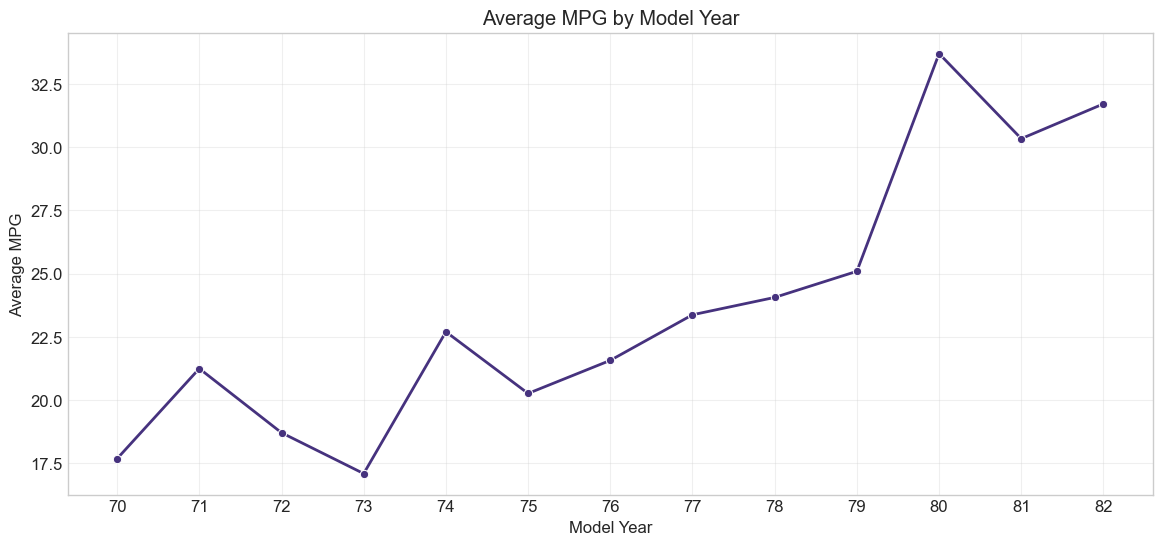

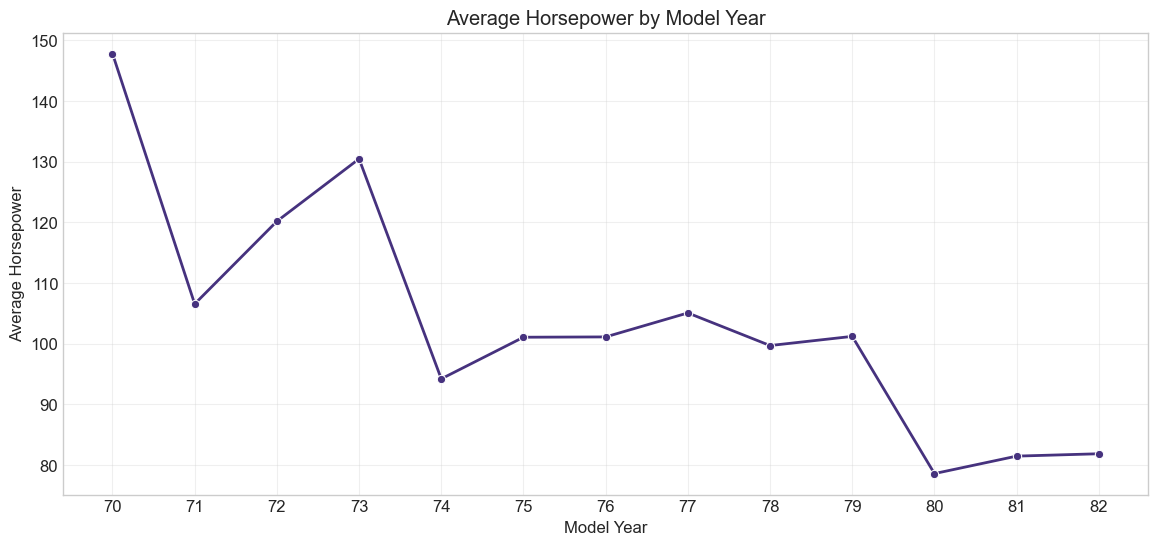

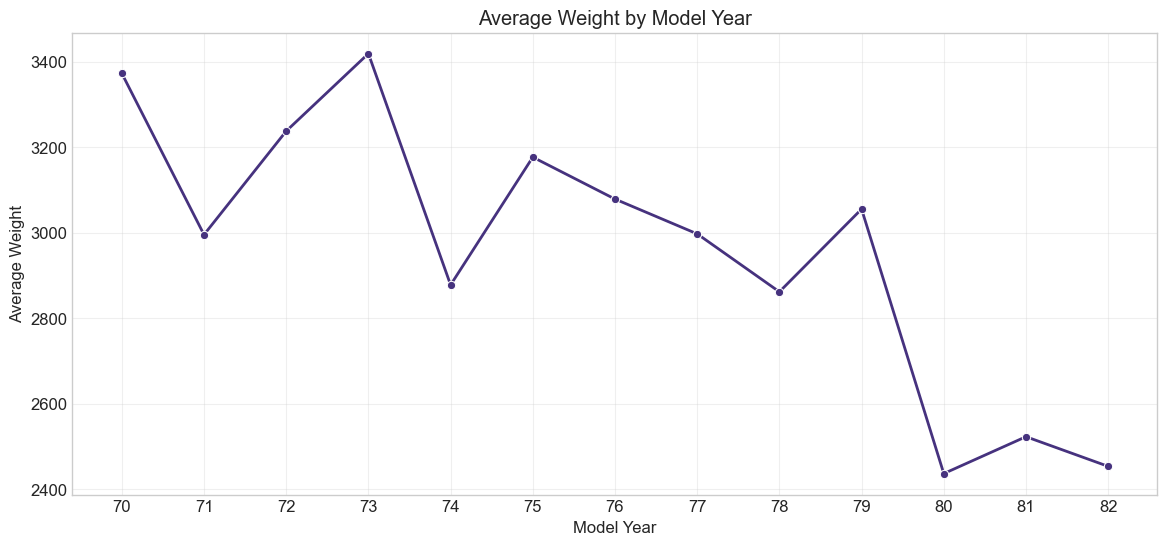

C:\Users\Ruchir\AppData\Local\Temp\ipykernel_30696\465481459.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='model_year', y='mpg', hue='origin', data=df, marker='o', ci=None)


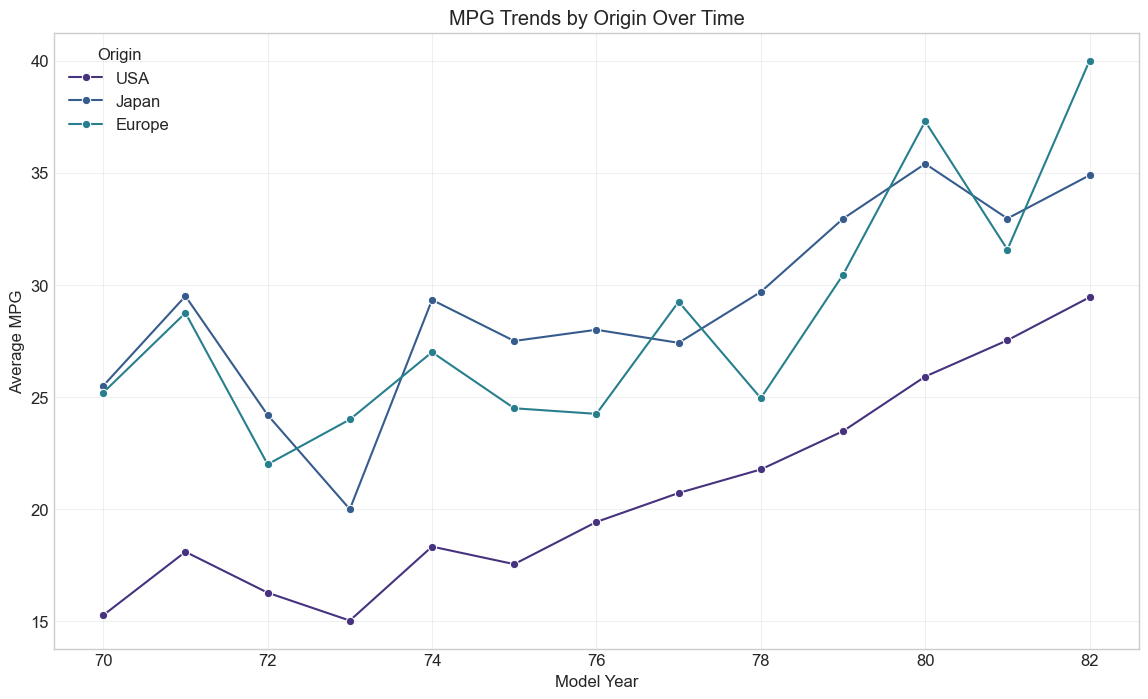

In [ ]:
plt.figure(figsize=(14, 6))
yearly_mpg = df.groupby('model_year')['mpg'].mean().reset_index()
sns.lineplot(x='model_year', y='mpg', data=yearly_mpg, marker='o', linewidth=2)
plt.title('Average MPG by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_mpg['model_year'])
plt.show()

plt.figure(figsize=(14, 6))
yearly_hp = df.groupby('model_year')['horsepower'].mean().reset_index()
sns.lineplot(x='model_year', y='horsepower', data=yearly_hp, marker='o', linewidth=2)
plt.title('Average Horsepower by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Horsepower')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_hp['model_year'])
plt.show()

plt.figure(figsize=(14, 6))
yearly_weight = df.groupby('model_year')['weight'].mean().reset_index()
sns.lineplot(x='model_year', y='weight', data=yearly_weight, marker='o', linewidth=2)
plt.title('Average Weight by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Weight')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_weight['model_year'])
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(x='model_year', y='mpg', hue='origin', data=df, marker='o', ci=None)
plt.title('MPG Trends by Origin Over Time')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.grid(True, alpha=0.3)
plt.legend(title='Origin')
plt.show()
